<font size=+4 color="Brown"><center><b>Sleep Quality Prediction/Classification Based On Covid</b></center></font>
<font size=-1 color="orange"><center><b>*Series: All about Data Cleansing/Processing/Prediction </b></right></font>

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>  
- <a href='#5'>Data Cleansing && Processing</a>
- <a href='#5.1'>Exploratory Data Analysis</a>
- <a href='#A'>Machine Learning Algorithms</a>
- <a href='#a'>Applying Machine Learning Models on Covid Positive Sleep quality data</a>

- <a href='#6'>Applying Machine Learning algorithms on Covid(-ve)</a>  
- <a href='#7'>Comparission of Quality of Sleep With and With out Covid in People</a>
    - <a href='#7.1'>Saving Model Predictions On New I/P</a> 
    - <a href='#7.2'>IS Quality of Sleep is Better in people without COVID</a> 
- <a href='#8'>Classification Algorithms</a> 
- <a href='#9'>IS X (i/p)Variables Impact Target (o/p)</a> 
- <a href='#10'>UnderSampling</a> 
- <a href='#10.1'>Applying Machine Learning algorithms on Under_Sampling Data</a> 
-<a href='#11'>OverSampling</a>
-<a href='#12'>Applying Machine Learning Algorithms on OverSampling Data</a>
-<a href='#13'>Feature Engineering</a> 
-<a href='#14'>HyperParameter Optimization</a> 


<a id="1"></a>
    
<font size="+2" color="indigo"><b> Introduction</b></font><br>

# <a id="2"></a>
    
<font size="+2" color="indigo"><b>Importing libraries</b></font><br>

In [213]:
import numpy as np              #importing important libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option("display.max_columns",None)   # setting for showing max columns
pd.set_option("display.max_rows",None)     # setting for showing max rows
#importing machine learning libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,roc_auc_score,auc

<a id="3"></a>
    
<font size="+2" color="indigo"><b>Read the Data</b></font><br>

In [214]:
 # reading the dataset
data=pd.read_csv("covid 19 short (1) (1).csv") 

# print first five rows
data.head()

unique_id  record_id redcap_repeat_instrument  redcap_repeat_instance  \
0      218L        218                  covid19                       1   
1      341L        341                  covid19                       1   
2      612L        612                  covid19                       1   
3      855L        855                  covid19                       1   
4      954L        954                  covid19                       1   

   redcap_survey_identifier covid19_timestamp  sub_id      todays_date  \
0                       NaN   3/23/2020 20:18       1  3/23/2020 16:11   
1                       NaN   3/24/2020 14:43       1  3/24/2020 10:38   
2                       NaN   3/25/2020 21:38       1  3/25/2020 17:33   
3                       NaN    3/27/2020 0:23       1  3/26/2020 20:18   
4                       NaN   3/27/2020 13:20       1   3/27/2020 9:16   

  sleepdiary_bedtime sleepdiary_fallasleep  sleepdiary_sleeplatency  \
0              22:30                 23:00                     15.0   
1              23:00                 23:15                     10.0   
2              22:30                 22:30                     22.0   
3              22:30                 23:00                     30.0   
4              23:30                 23:30                     10.0   

   sleepdiary_wakes  night_awakening_time sleepdiary_waketime  \
0               2.0                   7.0                4:30   
1               1.0                   3.0                7:00   
2               1.0                   2.0                4:30   
3               1.0                   3.0                6:45   
4               0.0                   0.0                5:45   

  sleepdiary_outofbed  sleepdiary_fellasleep  sleepdiary_dreams  \
0                4:35                    1.0                2.0   
1                7:00                    1.0                3.0   
2                4:30                    1.0                3.0   
3                7:00                    2.0                1.0   
4                5:50                    1.0                3.0   

   sleepdiary_nap  sleepdiary_naptime  cst  step_counter  steps  leave_house  \
0             0.0                 0.0  0.0           0.0    NaN          0.0   
1             0.0                 0.0  0.0           0.0    NaN          1.0   
2             0.0                 0.0  0.0           0.0    NaN          1.0   
3             0.0                 0.0  0.0           0.0    NaN          1.0   
4             0.0                 0.0  0.0           0.0    NaN          1.0   

   people_contact  socialize  socialize_min  sleepdiary_exercise  alcohol_bev  \
0             1.0        1.0           20.0                  2.0          0.0   
1             2.0        1.0           20.0                  2.0          0.0   
2             2.0        1.0           40.0                  1.0          0.0   
3             3.0        1.0           60.0                  1.0          0.0   
4             4.0        1.0           30.0                  2.0          0.0   

   quarantine  quarantine_days  fever  feverseverity  fever_temp  \
0         0.0              NaN    0.0            NaN         NaN   
1         0.0              NaN    0.0            NaN         NaN   
2         0.0              NaN    0.0            NaN         NaN   
3         0.0              NaN    0.0            NaN         NaN   
4         0.0              NaN    0.0            NaN         NaN   

   temp_measure  respiratory  respiratory_severity  tested  covid_status  \
0           NaN          0.0                   NaN     0.0           0.0   
1           NaN          0.0                   NaN     0.0           0.0   
2           NaN          0.0                   NaN     0.0           0.0   
3           NaN          0.0                   NaN     0.0           0.0   
4           NaN          0.0                   NaN     0.0           0.0   

   panas_interested3  panas_distressed3  panas_exci

<a id="4"></a>
    
<font size="+2" color="indigo"><b>Check the Data</b></font><br>

In [215]:
# shape of dataset
data.shape

(4417, 98)

In [216]:
data['covid_status'].value_counts()

0.0    4365
1.0      30
Name: covid_status, dtype: int64

In [217]:
# getting the information of the data i.e., about the data types of each column
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_id                       4417 non-null   object 
 1   record_id                       4417 non-null   int64  
 2   redcap_repeat_instrument        4417 non-null   object 
 3   redcap_repeat_instance          4417 non-null   int64  
 4   redcap_survey_identifier        0 non-null      float64
 5   covid19_timestamp               1983 non-null   object 
 6   sub_id                          4417 non-null   int64  
 7   todays_date                     4417 non-null   object 
 8   sleepdiary_bedtime              4416 non-null   object 
 9   sleepdiary_fallasleep           4414 non-null   object 
 10  sleepdiary_sleeplatency         4396 non-null   float64
 11  sleepdiary_wakes                4414 non-null   float64
 12  night_awakening_time            44

In [218]:
 # getting the statistical description of the dataset
data.describe()

record_id  redcap_repeat_instance  redcap_survey_identifier  \
count   4417.000000                  4417.0                       0.0   
mean    6577.410233                     1.0                       NaN   
std     5263.630358                     0.0                       NaN   
min        1.000000                     1.0                       NaN   
25%     1630.000000                     1.0                       NaN   
50%     5540.000000                     1.0                       NaN   
75%    11156.000000                     1.0                       NaN   
max    17269.000000                     1.0                       NaN   

            sub_id  sleepdiary_sleeplatency  sleepdiary_wakes  \
count  4417.000000              4396.000000       4414.000000   
mean     76.626670                14.610093          1.311282   
std      43.891509                21.430926          1.244457   
min       1.000000                 0.000000          0.000000   
25%      40.000000                 5.000000          0.000000   
50%      71.000000                10.000000          1.000000   
75%     115.000000                15.000000          2.000000   
max     152.000000               300.000000          5.000000   

       night_awakening_time  sleepdiary_fellasleep  sleepdiary_dreams  \
count           4401.000000            1983.000000         4411.00000   
mean              14.781329               1.346445            1.92496   
std               28.361189               0.601458            0.92486   
min                0.000000               1.000000            1.00000   
25%                0.000000               1.000000            1.00000   
50%                5.000000               1.000000            2.00000   
75%               15.000000               2.000000            3.00000   
max              300.000000               3.000000            3.00000   

       sleepdiary_nap  sleepdiary_naptime          cst  step_counter  \
count     4407.000000         4406.000000  4406.000000   4413.000000   
mean         0.144770            7.238379     0.121879      0.424881   
std          0.351908           23.514178     0.327183      0.494381   
min          0.000000            0.000000     0.000000      0.000000   
25%          0.000000            0.000000     0.000000      0.000000   
50%          0.000000            0.000000     0.000000      0.000000   
75%          0.000000            0.000000     0.000000      1.000000   
max          1.000000          270.000000     1.000000      1.000000   

               steps  leave_house  people_contact    socialize  socialize_min  \
count    1789.000000  4410.000000     4388.000000  4413.000000    4404.000000   
mean     6594.784516     0.630839        8.389015     0.682755      51.784173   
std      6089.114814     0.482632      179.130900     0.465456      64.654732   
min         0.000000     0.000000        0.000000     0.000000       0.000000   
25%      3015.000000     0.000000        0.000000     0.000000       0.000000   
50%      5600.000000     1.000000        0.000000     1.000000      30.000000   
75%      9000.000000     1.000000        2.000000     1.000000      75.000000   
max    120000.000000     1.000000    10269.000000     1.000000     600.000000   

       sleepdiary_exercise  alcohol_bev   quarantine  quarantine_days  \
count          1983.000000  4383.000000  4410.000000       457.000000   
mean              0.910741     0.814442     0.104082        30.336980   
std               0.993724     1.597118     0.305401        20.476779   
min               0.000000     0.000000     0.000000         0.000000   
25%               0.000000     0.000000     0.000000        14.000000   
50%               1.000000     0.000000     0.000000        25.000000   
75%               2.000000     1.000000     0.000000        43.000000   
max               3.000000    45.000000     1.000000       103.000000   

             fever  feverseverity  fever_temp  temp_measure  respirator

In [219]:
# checking for null values the data in each column
data.isnull().sum() 

unique_id                            0
record_id                            0
redcap_repeat_instrument             0
redcap_repeat_instance               0
redcap_survey_identifier          4417
covid19_timestamp                 2434
sub_id                               0
todays_date                          0
sleepdiary_bedtime                   1
sleepdiary_fallasleep                3
sleepdiary_sleeplatency             21
sleepdiary_wakes                     3
night_awakening_time                16
sleepdiary_waketime                  9
sleepdiary_outofbed                  8
sleepdiary_fellasleep             2434
sleepdiary_dreams                    6
sleepdiary_nap                      10
sleepdiary_naptime                  11
cst                                 11
step_counter                         4
steps                             2628
leave_house                          7
people_contact                      29
socialize                            4
socialize_min            

# DATA ANALYSIS

In [220]:
data12=data.copy()  # copying data for data analysis

In [221]:
new_data = data12[['covid_status', 'worry_scale']].copy()  # getting column for analysis

In [222]:
new_data = new_data[new_data[['covid_status', 'worry_scale']].notnull().all(1)]  # ignoring null values
print(new_data['covid_status'].value_counts())
new_data['covid_status'] = new_data.covid_status.replace({1: True, 0: False})  # getting covid status in categorical format

0.0    1967
1.0      16
Name: covid_status, dtype: int64


Text(0.5, 0, 'worry_scale')

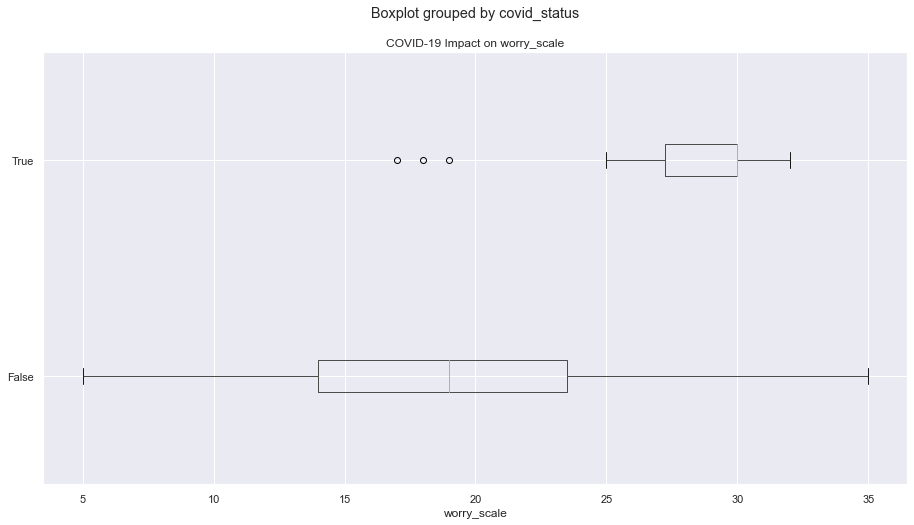

In [223]:
fig, ax = plt.subplots(1, figsize = (15,8))
plt.suptitle('')
new_data.boxplot(column = 'worry_scale', by = 'covid_status', ax = ax, vert = False)
plt.title("COVID-19 Impact on worry_scale")
plt.xlabel("worry_scale")

In [224]:
new_data = data12[['covid_status', 'stress', 'isolation', 'worry_scale','worry_finances']].copy()  # getting relevent columns
new_data = new_data[new_data[
    ['covid_status', 'stress', 'isolation', 'worry_scale','worry_finances']].notnull().all(1)]  # ignoring null values
new_data['covid_status'] = new_data.covid_status.replace({1: True, 0: False})
print(new_data['covid_status'].value_counts())
new_data = new_data.groupby(['covid_status'])[['stress', 'isolation', 'worry_scale','worry_finances']].mean()

False    1967
True       16
Name: covid_status, dtype: int64


Text(0.5, 0, 'Mental Health')

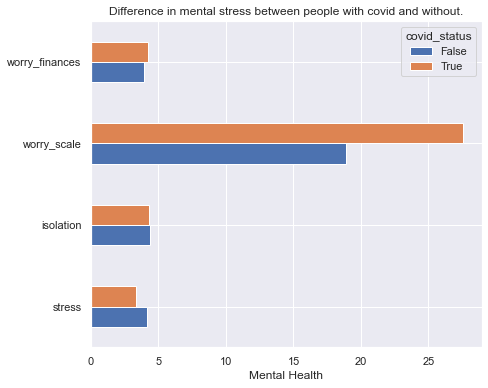

In [225]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,6
new_data.T.plot(kind = 'barh')
plt.title("Difference in mental stress between people with covid and without.")
plt.xlabel("Mental Health")

In [226]:
new_data = data12[['covid_status', 'sleepdiary_bedtime',
       'sleepdiary_fallasleep', 'sleepdiary_sleeplatency', 'sleepdiary_wakes',
       'night_awakening_time', 'sleepdiary_waketime', 'sleepdiary_outofbed',
       'sleepdiary_fellasleep', 'sleepdiary_dreams', 'sleepdiary_nap',
       'sleepdiary_naptime']].copy()  # getting relevent columns
new_data = new_data[new_data[
    ['covid_status', 'sleepdiary_bedtime',
       'sleepdiary_fallasleep', 'sleepdiary_sleeplatency', 'sleepdiary_wakes',
       'night_awakening_time', 'sleepdiary_waketime', 'sleepdiary_outofbed',
       'sleepdiary_fellasleep', 'sleepdiary_dreams', 'sleepdiary_nap',
       'sleepdiary_naptime']].notnull().all(1)]  # ignoring null values
new_data['covid_status'] = new_data.covid_status.replace({1: True, 0: False})
print(new_data['covid_status'].value_counts())
new_data = new_data.groupby(['covid_status'])[['sleepdiary_bedtime',
       'sleepdiary_fallasleep', 'sleepdiary_sleeplatency', 'sleepdiary_wakes',
       'night_awakening_time', 'sleepdiary_waketime', 'sleepdiary_outofbed',
       'sleepdiary_fellasleep', 'sleepdiary_dreams', 'sleepdiary_nap',
       'sleepdiary_naptime']].mean()

False    1967
True       16
Name: covid_status, dtype: int64


Text(0.5, 0, 'Sleep Factors')

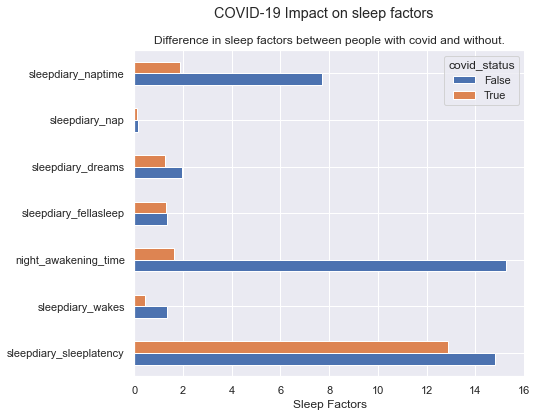

In [227]:
rcParams['figure.figsize'] = 7,6
new_data.T.plot(kind = 'barh')
plt.suptitle('COVID-19 Impact on sleep factors')
plt.title("Difference in sleep factors between people with covid and without.")
plt.xlabel("Sleep Factors")

In [228]:
# Conversion to minutes for all time variables
data3=data.copy()
data3['TIB_minutes'] = data3['TIB']*60
data3['sleepattempt_minutes'] = data3['sleepattempt']*60
data3['TST_minutes'] = data3['TST']*60

 #drop columns associated with hour unit of measurement
data4 = data3[['TIB_12', 'TST_12', 'SE', 'sleepdiary_sleeplatency', 'sleepdiary_wakes', 'night_awakening_time',
        'sleepdiary_fellasleep', 'sleepdiary_dreams', 'sleepdiary_nap', 'sleepdiary_naptime', 'cst',
       'TIB_minutes', 'sleepattempt_minutes', 'TST_minutes']]

In [229]:
data['depression']=data['depression1']+data['depression2']+data['depression3']+data['depression4']+data['depression5']+data['depression6']+data['depression7']+data['depression8']
#analysis of depression on total sleep time

In [230]:
plt.figure(figsize=(10,6))
plt.title("lineplot between depression and TST")
sns.lineplot(data=data,y='TST',x='depression')

<AxesSubplot:title={'center':'lineplot between depression and TST'}, xlabel='depression', ylabel='TST'>

In [231]:
data['total_panas']=data['panas_interested3']+data['panas_distressed3']+data['panas_excited3']+data['panas_upset3']+data['panas_strong3']+data['panas_guilty3']+ data['panas_scared3']+ data['panas_hostile3']+data['panas_enthusiastic3']+ data['panas_proud3']+ data['panas_irritable3']+data['panas_alert3']+ data['panas_ashamed3']+ data['panas_inspired3']+ data['panas_nervous3']+data['panas_determined3']+data['panas_attentive3']+data['panas_jittery3']+data['panas_active3']+data['panas_afraid3']+data['panas_sad3']+ data['panas_happy3']+data['panas_angry3']
#analysis of all panas wrt to TST

<AxesSubplot:title={'center':'lineplot between homeown and income'}, xlabel='total_panas', ylabel='TST'>

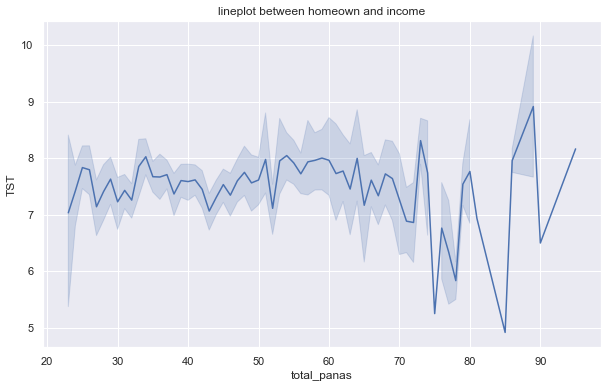

In [232]:
plt.figure(figsize=(10,6))
plt.title("lineplot between homeown and income")
sns.lineplot(data=data,y='TST',x='total_panas')

In [233]:
data2=data.copy()  # copying data for getting the impact of covid on different factors

In [234]:
data3 = data2[[
    'unique_id', 'covid_status', 'TST', 'sleepdiary_fellasleep', 
    'socialize_min', 'exercise', 'stress', 'isolation', 'worry_scale','total_panas','depression'
    ]].copy()
data3['covid_status'] = data3.covid_status.replace({1: True, 0: False})  # changing into categorical format

data3 = data3[data3[['covid_status']].notnull().all(1)]  # ignoring null values

In [236]:
aggregate_table = data3.groupby(['covid_status'])[[
    'TST', 'sleepdiary_fellasleep', 'socialize_min', 'exercise', 'stress', 'isolation', 'worry_scale','total_panas','depression'
]].mean().round(3).reset_index()

In [237]:
aggregate_table = aggregate_table.rename(columns = {
    'TST': 'total_sleep_time', 'sleepdiary_fellasleep': 'difficulty_falling_asleep', 
    'socialize_min': 'virtually_socialization_min', 'exercise': 'prop_exercise', 
    'stress': 'stress_level', 'isolation': 'isolation_level', 'worry_scale': 'worry_level','total_panas':'panas_level','depression':'depression_level'
})
aggregate_table

covid_status  total_sleep_time  difficulty_falling_asleep  \
0         False             7.638                      1.347   
1          True             7.427                      1.312   

   virtually_socialization_min  prop_exercise  stress_level  isolation_level  \
0                       51.912          0.509         4.290            4.390   
1                       38.500          0.067         3.367            4.312   

   worry_level  panas_level  depression_level  
0       18.888       44.997             4.794  
1       27.562       33.812             5.875

In [238]:
type(aggregate_table)

pandas.core.frame.DataFrame

In [239]:
aggregate_table.columns

Index(['covid_status', 'total_sleep_time', 'difficulty_falling_asleep',
       'virtually_socialization_min', 'prop_exercise', 'stress_level',
       'isolation_level', 'worry_level', 'panas_level', 'depression_level'],
      dtype='object')

In [240]:
num_features=[features for features in aggregate_table.columns if aggregate_table[features].dtypes !="O"]   # getting numerical features
cat_features=[features for features in aggregate_table.columns if features not in num_features]  # getting categorical features
print("Numerical Features Count {}".format(len(num_features)))
print(num_features)

Numerical Features Count 10
['covid_status', 'total_sleep_time', 'difficulty_falling_asleep', 'virtually_socialization_min', 'prop_exercise', 'stress_level', 'isolation_level', 'worry_level', 'panas_level', 'depression_level']


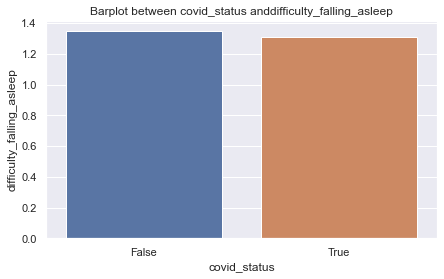

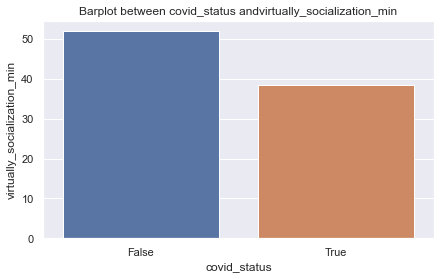

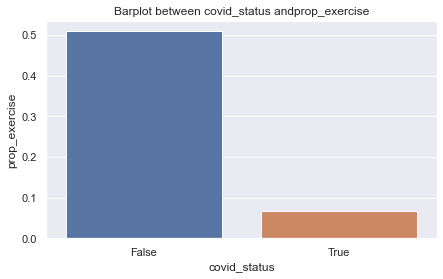

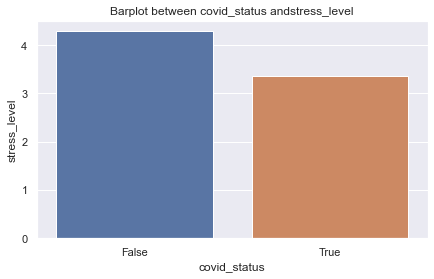

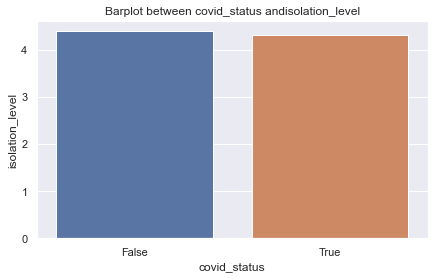

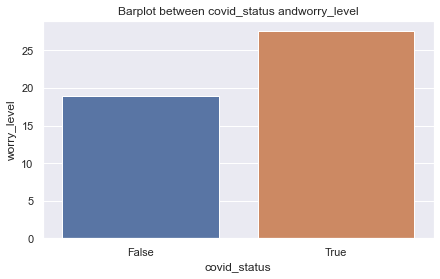

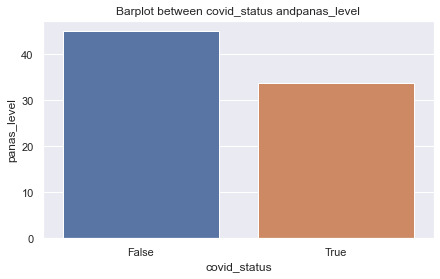

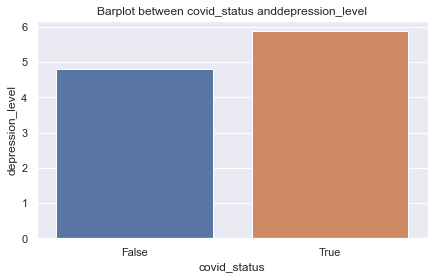

In [241]:
for feature in num_features:         # visualization of distribution of dataset
    data5=aggregate_table.copy()
    plt.figure(figsize=(7,4))      
    plt.title("Barplot between covid_status and" + feature)
    sns.barplot(data=data5,x='covid_status',y=feature)
    plt.show()

In [242]:
data13=data[['todays_date', 'sleepdiary_bedtime',                  # getting only relevent columns for futher analysis
       'sleepdiary_fallasleep', 'sleepdiary_sleeplatency', 'sleepdiary_wakes',
       'night_awakening_time', 'sleepdiary_waketime', 'sleepdiary_outofbed',
       'sleepdiary_fellasleep', 'sleepdiary_dreams', 'sleepdiary_nap',
       'sleepdiary_naptime', 'cst', 'steps', 'leave_house',
       'people_contact', 'socialize', 'sleepdiary_exercise',
       'alcohol_bev', 'quarantine', 'quarantine_days', 'fever',
       'feverseverity', 'respiratory',
       'respiratory_severity', 'tested', 'covid_status', 'panas_interested3',
       'panas_distressed3', 'panas_excited3', 'panas_upset3', 'panas_strong3',
       'panas_guilty3', 'panas_scared3', 'panas_hostile3',
       'panas_enthusiastic3', 'panas_proud3', 'panas_irritable3',
       'panas_alert3', 'panas_ashamed3', 'panas_inspired3', 'panas_nervous3',
       'panas_determined3', 'panas_attentive3', 'panas_jittery3',
       'panas_active3', 'panas_afraid3', 'panas_sad3', 'panas_happy3',
       'panas_angry3', 'isolation', 'worry_health', 'family_health',
       'community_1health', 'national_health', 'worry_finances', 'stress',
       'depression1', 'depression2', 'depression3', 'depression4',
       'depression5', 'depression6', 'depression7', 'depression8','TIB', 'TIB_12', 'sleepattempt', 'TST_12', 'TST', 'SE',
       'worry_scale', 'PHQ9', 'exercise',
       'fever_temp_C']]

In [243]:
data13.head(5)  # visualising first five columns from the data

todays_date sleepdiary_bedtime sleepdiary_fallasleep  \
0  3/23/2020 16:11              22:30                 23:00   
1  3/24/2020 10:38              23:00                 23:15   
2  3/25/2020 17:33              22:30                 22:30   
3  3/26/2020 20:18              22:30                 23:00   
4   3/27/2020 9:16              23:30                 23:30   

   sleepdiary_sleeplatency  sleepdiary_wakes  night_awakening_time  \
0                     15.0               2.0                   7.0   
1                     10.0               1.0                   3.0   
2                     22.0               1.0                   2.0   
3                     30.0               1.0                   3.0   
4                     10.0               0.0                   0.0   

  sleepdiary_waketime sleepdiary_outofbed  sleepdiary_fellasleep  \
0                4:30                4:35                    1.0   
1                7:00                7:00                    1.0   
2                4:30                4:30                    1.0   
3                6:45                7:00                    2.0   
4                5:45                5:50                    1.0   

   sleepdiary_dreams  sleepdiary_nap  sleepdiary_naptime  cst  steps  \
0                2.0             0.0                 0.0  0.0    NaN   
1                3.0             0.0                 0.0  0.0    NaN   
2                3.0             0.0                 0.0  0.0    NaN   
3                1.0             0.0                 0.0  0.0    NaN   
4                3.0             0.0                 0.0  0.0    NaN   

   leave_house  people_contact  socialize  sleepdiary_exercise  alcohol_bev  \
0          0.0             1.0        1.0                  2.0          0.0   
1          1.0             2.0        1.0                  2.0          0.0   
2          1.0             2.0        1.0                  1.0          0.0   
3          1.0             3.0        1.0                  1.0          0.0   
4          1.0             4.0        1.0                  2.0          0.0   

   quarantine  quarantine_days  fever  feverseverity  respiratory  \
0         0.0              NaN    0.0            NaN          0.0   
1         0.0              NaN    0.0            NaN          0.0   
2         0.0              NaN    0.0            NaN          0.0   
3         0.0              NaN    0.0            NaN          0.0   
4         0.0              NaN    0.0            NaN          0.0   

   respiratory_severity  tested  covid_status  panas_interested3  \
0                   NaN     0.0           0.0                3.0   
1                   NaN     0.0           0.0                2.0   
2                   NaN     0.0           0.0                1.0   
3                   NaN     0.0           0.0                2.0   
4                   NaN     0.0           0.0                2.0   

   panas_distressed3  panas_excited3  panas_upset3  panas_strong3  \
0                1.0             1.0           1.0            1.0   
1                1.0             1.0           1.0            1.0   
2                1.0             1.0           1.0            1.0   
3                2.0             1.0           1.0            1.0   
4                1.0             1.0           1.0            1.0   

   panas_guilty3  panas_scared3  panas_hostile3  panas_enthusiastic3  \
0            1.0            1.0             1.0                  1.0   
1            1.0            1.0             1.0                  1.0   
2            1.0            1.0             1.0                  1.0   
3            1.0            1.0             1.0                  2.0   
4            1.0            1.0             1.0                  1.0   

   panas_proud3  panas_irritable3  panas_alert3  panas_ashamed3  \
0           1.0               1.0           3.0             1.0   
1           1.0               1.0           2.0             1.0   
2           1.0  

In [244]:
percent_missing = (data13.isnull().sum() * 100) / len(data13)     # calculating missing percentage
missing_value_data = pd.DataFrame({'column_name': data13.columns,
                                 'percent_missing': percent_missing})
missing_value_data   # visualising the missing values from data

column_name  percent_missing
todays_date                          todays_date         0.000000
sleepdiary_bedtime            sleepdiary_bedtime         0.022640
sleepdiary_fallasleep      sleepdiary_fallasleep         0.067919
sleepdiary_sleeplatency  sleepdiary_sleeplatency         0.475436
sleepdiary_wakes                sleepdiary_wakes         0.067919
night_awakening_time        night_awakening_time         0.362237
sleepdiary_waketime          sleepdiary_waketime         0.203758
sleepdiary_outofbed          sleepdiary_outofbed         0.181118
sleepdiary_fellasleep      sleepdiary_fellasleep        55.105275
sleepdiary_dreams              sleepdiary_dreams         0.135839
sleepdiary_nap                    sleepdiary_nap         0.226398
sleepdiary_naptime            sleepdiary_naptime         0.249038
cst                                          cst         0.249038
steps                                      steps        59.497396
leave_house                          leave_house         0.158479
people_contact                    people_contact         0.656554
socialize                              socialize         0.090559
sleepdiary_exercise          sleepdiary_exercise        55.105275
alcohol_bev                          alcohol_bev         0.769753
quarantine                            quarantine         0.158479
quarantine_days                  quarantine_days        89.653611
fever                                      fever         0.226398
feverseverity                      feverseverity        99.728322
respiratory                          respiratory         0.158479
respiratory_severity        respiratory_severity        96.875707
tested                                    tested         0.113199
covid_status                        covid_status         0.498076
panas_interested3              panas_interested3        55.105275
panas_distressed3              panas_distressed3        55.105275
panas_excited3                    panas_excited3        55.105275
panas_upset3                        panas_upset3        55.105275
panas_strong3                      panas_strong3        55.105275
panas_guilty3                      panas_guilty3        55.105275
panas_scared3                      panas_scared3        55.105275
panas_hostile3                    panas_hostile3        55.105275
panas_enthusiastic3          panas_enthusiastic3        55.105275
panas_proud3                        panas_proud3        55.105275
panas_irritable3                panas_irritable3        55.105275
panas_alert3                        panas_alert3        55.105275
panas_ashamed3                    panas_ashamed3        55.105275
panas_inspired3                  panas_inspired3        55.105275
panas_nervous3                    panas_nervous3        55.105275
panas_determined3              panas_determined3        55.105275
panas_attentive3                panas_attentive3        55.105275
panas_jittery3                    panas_jittery3        55.105275
panas_active3                      panas_active3        55.105275
panas_afraid3                      panas_afraid3        55.105275
panas_sad3                            panas_sad3        55.105275
panas_happy3                        panas_happy3        55.105275
panas_angry3                        panas_angry3        55.105275
isolation                              isolation        55.105275
worry_health                        worry_health        55.105275
family_health                      family_health        55.105275
community_1health              community_1health        55.105275
national_health                  national_health        55.105275
worry_finances                    worry_finances        55.105275
stress                                    stress         0.090559
depression1                          depression1        55.105275
depression2                          depression2        55.105275
depression3                          depression3        55.105275
depression4

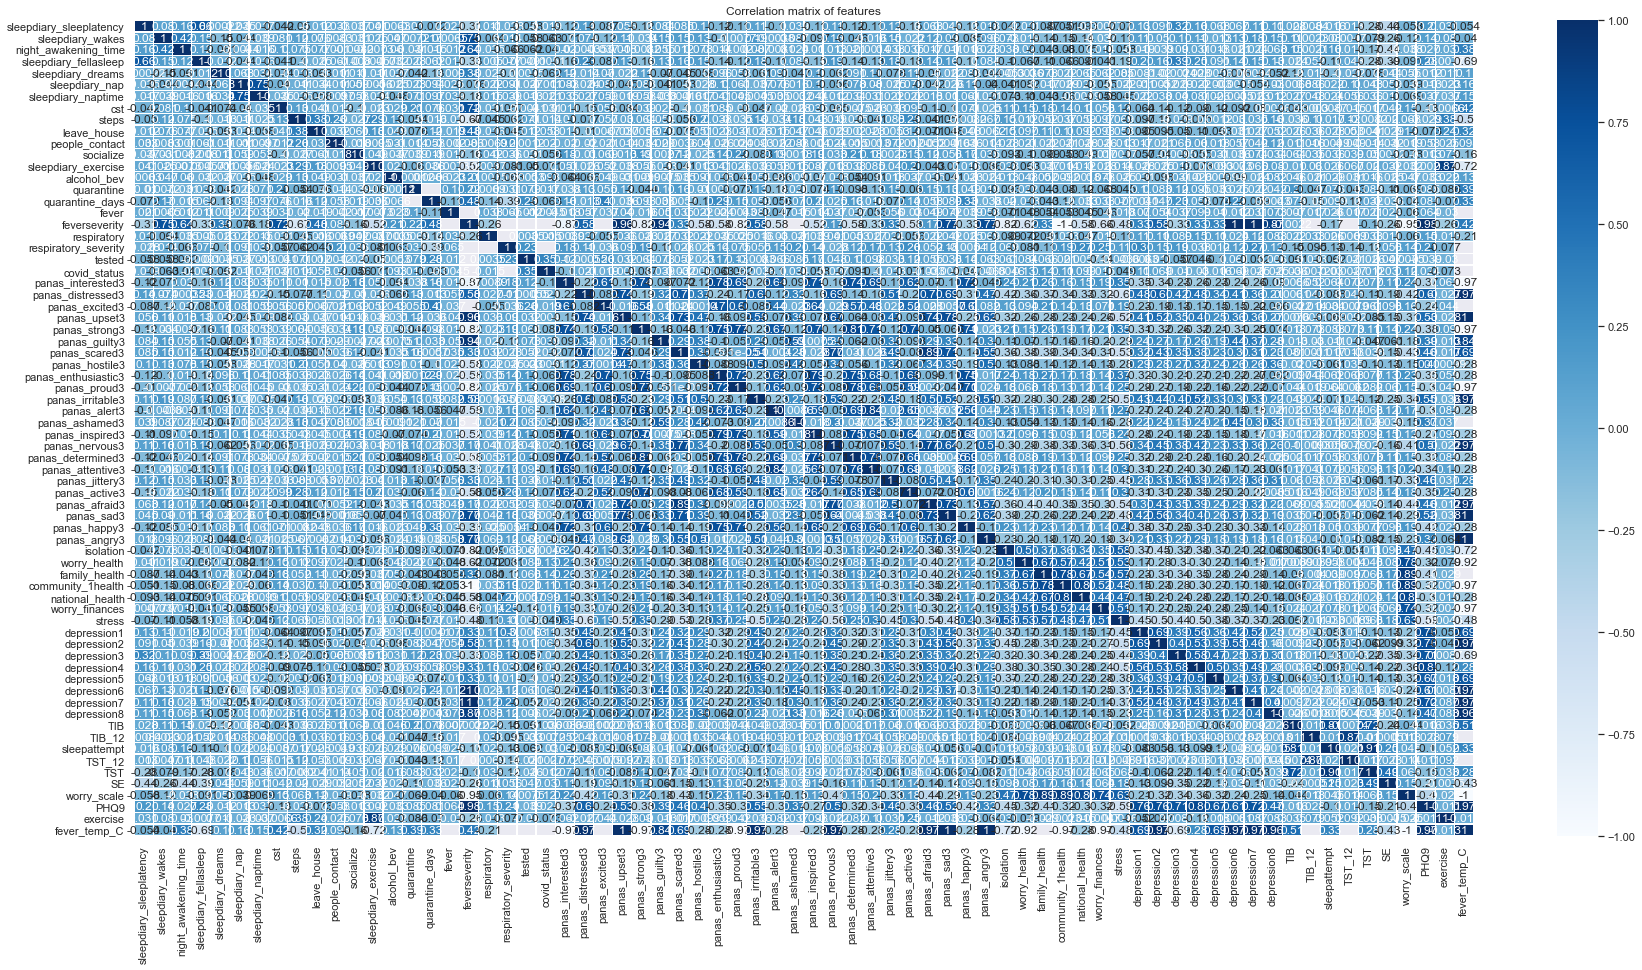

In [245]:
corr = data13.corr()
fig, ax = plt.subplots(figsize=(30,15))                                 # plotting co-relation matrix
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [246]:
cor_matrix = data13.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                         sleepdiary_sleeplatency  sleepdiary_wakes  \
sleepdiary_sleeplatency                      NaN          0.080453   
sleepdiary_wakes                             NaN               NaN   
night_awakening_time                         NaN               NaN   
sleepdiary_fellasleep                        NaN               NaN   
sleepdiary_dreams                            NaN               NaN   
sleepdiary_nap                               NaN               NaN   
sleepdiary_naptime                           NaN               NaN   
cst                                          NaN               NaN   
steps                                        NaN               NaN   
leave_house                                  NaN               NaN   
people_contact                               NaN               NaN   
socialize                                    NaN               NaN   
sleepdiary_exercise                          NaN               NaN   
alcohol_bev         

In [247]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]  # getting columns having co-relation > 0.9
print(to_drop)

['panas_upset3', 'panas_guilty3', 'community_1health', 'depression6', 'depression7', 'TST', 'worry_scale', 'PHQ9', 'fever_temp_C']


In [248]:
data13[['sleepdiary_sleeplatency', 'SE']].corr()  # co-relation between target variable and feature variable

sleepdiary_sleeplatency        SE
sleepdiary_sleeplatency                 1.000000 -0.442098
SE                                     -0.442098  1.000000

In [249]:
data13[['sleepdiary_fellasleep', 'SE']].corr()     # co-relation between target variable and feature variable

sleepdiary_fellasleep        SE
sleepdiary_fellasleep               1.000000 -0.393007
SE                                 -0.393007  1.000000

In [250]:
data13[['steps', 'SE']].corr()    # co-relation between target variable and feature variable

steps        SE
steps  1.000000  0.020075
SE     0.020075  1.000000

In [251]:
data13[['sleepdiary_exercise', 'SE']].corr()   # co-relation between target variable and feature variable

sleepdiary_exercise        SE
sleepdiary_exercise             1.000000  0.032252
SE                              0.032252  1.000000

In [252]:
data13[['quarantine_days', 'SE']].corr()   # co-relation between target variable and feature variable

quarantine_days        SE
quarantine_days         1.000000 -0.036409
SE                     -0.036409  1.000000

In [39]:
data13[['feverseverity', 'SE']].corr()   # co-relation between target variable and feature variable

feverseverity        SE
feverseverity       1.000000 -0.260539
SE                 -0.260539  1.000000

In [253]:
data13[['respiratory_severity', 'SE']].corr()   # co-relation between target variable and feature variable

respiratory_severity        SE
respiratory_severity              1.000000  0.056222
SE                                0.056222  1.000000

In [254]:
data13[['panas_interested3', 'SE']].corr()   # co-relation between target variable and feature variable

panas_interested3        SE
panas_interested3           1.000000  0.113363
SE                          0.113363  1.000000

In [255]:
data13[['isolation', 'SE']].corr()   # co-relation between target variable and feature variable

isolation        SE
isolation   1.000000  0.098402
SE          0.098402  1.000000

In [43]:
data13[['worry_health', 'SE']].corr()   # co-relation between target variable and feature variable

worry_health        SE
worry_health      1.000000  0.079996
SE                0.079996  1.000000

In [256]:
data13[['family_health', 'SE']].corr()   # co-relation between target variable and feature variable

family_health        SE
family_health       1.000000  0.172735
SE                  0.172735  1.000000

In [257]:
data13[['worry_finances', 'SE']].corr()     # co-relation between target variable and feature variable

worry_finances        SE
worry_finances        1.000000  0.064364
SE                    0.064364  1.000000

In [258]:
data13[['stress', 'SE']].corr()   # co-relation between target variable and feature variable

stress        SE
stress  1.000000  0.183295
SE      0.183295  1.000000

In [47]:
data13[['depression1', 'SE']].corr()     # co-relation between target variable and feature variable

depression1        SE
depression1     1.000000 -0.126501
SE             -0.126501  1.000000

In [259]:
data13[['worry_scale', 'SE']].corr()    # co-relation between target variable and feature variable

worry_scale        SE
worry_scale     1.000000  0.148238
SE              0.148238  1.000000

In [260]:
data13[['PHQ9', 'SE']].corr()    # co-relation between target variable and feature variable

PHQ9        SE
PHQ9  1.000000 -0.212934
SE   -0.212934  1.000000

In [261]:
data13[['sleepdiary_nap', 'SE']].corr()   # co-relation between important  feature variables

sleepdiary_nap        SE
sleepdiary_nap        1.000000  0.058525
SE                    0.058525  1.000000

In [51]:
data13[['tested', 'SE']].corr()    # co-relation between important feature variables

tested        SE
tested  1.000000  0.047423
SE      0.047423  1.000000

In [262]:
data13[['people_contact', 'covid_status']].corr()  

people_contact  covid_status
people_contact        1.000000      0.020071
covid_status          0.020071      1.000000

In [263]:
data13[['socialize', 'covid_status']].corr() 

socialize  covid_status
socialize      1.000000     -0.056188
covid_status  -0.056188      1.000000

In [264]:
data13[['quarantine', 'covid_status']].corr() 

quarantine  covid_status
quarantine      1.000000      0.016838
covid_status    0.016838      1.000000

In [55]:
data13[['alcohol_bev', 'covid_status']].corr() 

alcohol_bev  covid_status
alcohol_bev       1.00000       0.09283
covid_status      0.09283       1.00000

In [265]:
data13[['isolation', 'covid_status']].corr() 

isolation  covid_status
isolation      1.000000     -0.004576
covid_status  -0.004576      1.000000

In [266]:
data13[['exercise', 'covid_status']].corr()

exercise  covid_status
exercise      1.000000     -0.072816
covid_status -0.072816      1.000000

In [267]:
data13[['sleepdiary_waketime', 'covid_status']].corr()

covid_status
covid_status           1.0

In [268]:
data13[['night_awakening_time', 'covid_status']].corr()

night_awakening_time  covid_status
night_awakening_time              1.000000     -0.039656
covid_status                     -0.039656      1.000000

In [269]:
data13.columns

Index(['todays_date', 'sleepdiary_bedtime', 'sleepdiary_fallasleep',
       'sleepdiary_sleeplatency', 'sleepdiary_wakes', 'night_awakening_time',
       'sleepdiary_waketime', 'sleepdiary_outofbed', 'sleepdiary_fellasleep',
       'sleepdiary_dreams', 'sleepdiary_nap', 'sleepdiary_naptime', 'cst',
       'steps', 'leave_house', 'people_contact', 'socialize',
       'sleepdiary_exercise', 'alcohol_bev', 'quarantine', 'quarantine_days',
       'fever', 'feverseverity', 'respiratory', 'respiratory_severity',
       'tested', 'covid_status', 'panas_interested3', 'panas_distressed3',
       'panas_excited3', 'panas_upset3', 'panas_strong3', 'panas_guilty3',
       'panas_scared3', 'panas_hostile3', 'panas_enthusiastic3',
       'panas_proud3', 'panas_irritable3', 'panas_alert3', 'panas_ashamed3',
       'panas_inspired3', 'panas_nervous3', 'panas_determined3',
       'panas_attentive3', 'panas_jittery3', 'panas_active3', 'panas_afraid3',
       'panas_sad3', 'panas_happy3', 'panas_angry3',

In [270]:
data13=data[['todays_date','sleepdiary_sleeplatency', 'sleepdiary_wakes', 'night_awakening_time', 'sleepdiary_fellasleep',
       'sleepdiary_dreams', 'sleepdiary_nap', 'cst', 'leave_house', 'people_contact', 'socialize', 'alcohol_bev', 'quarantine',
       'fever', 'respiratory',
       'tested', 'covid_status', 'TIB','sleepattempt', 'TST', 'SE','exercise']]  # getting necessary columns fromn the whole data

In [271]:
data13.isnull().sum() 

todays_date                   0
sleepdiary_sleeplatency      21
sleepdiary_wakes              3
night_awakening_time         16
sleepdiary_fellasleep      2434
sleepdiary_dreams             6
sleepdiary_nap               10
cst                          11
leave_house                   7
people_contact               29
socialize                     4
alcohol_bev                  34
quarantine                    7
fever                        10
respiratory                   7
tested                        5
covid_status                 22
TIB                          61
sleepattempt                 44
TST                          82
SE                          108
exercise                      0
dtype: int64

In [272]:
data13=data13.dropna(axis=0)  # since data contains null values therefore dropping unnecessary rows

In [273]:
data13.isnull().sum()          # cross-checking for null values in pre-processed data after removing null values

todays_date                0
sleepdiary_sleeplatency    0
sleepdiary_wakes           0
night_awakening_time       0
sleepdiary_fellasleep      0
sleepdiary_dreams          0
sleepdiary_nap             0
cst                        0
leave_house                0
people_contact             0
socialize                  0
alcohol_bev                0
quarantine                 0
fever                      0
respiratory                0
tested                     0
covid_status               0
TIB                        0
sleepattempt               0
TST                        0
SE                         0
exercise                   0
dtype: int64

In [274]:
corr = data13.corr()
fig, ax = plt.subplots(figsize=(15,7))                                 # plotting co-relation matrix of processed data
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

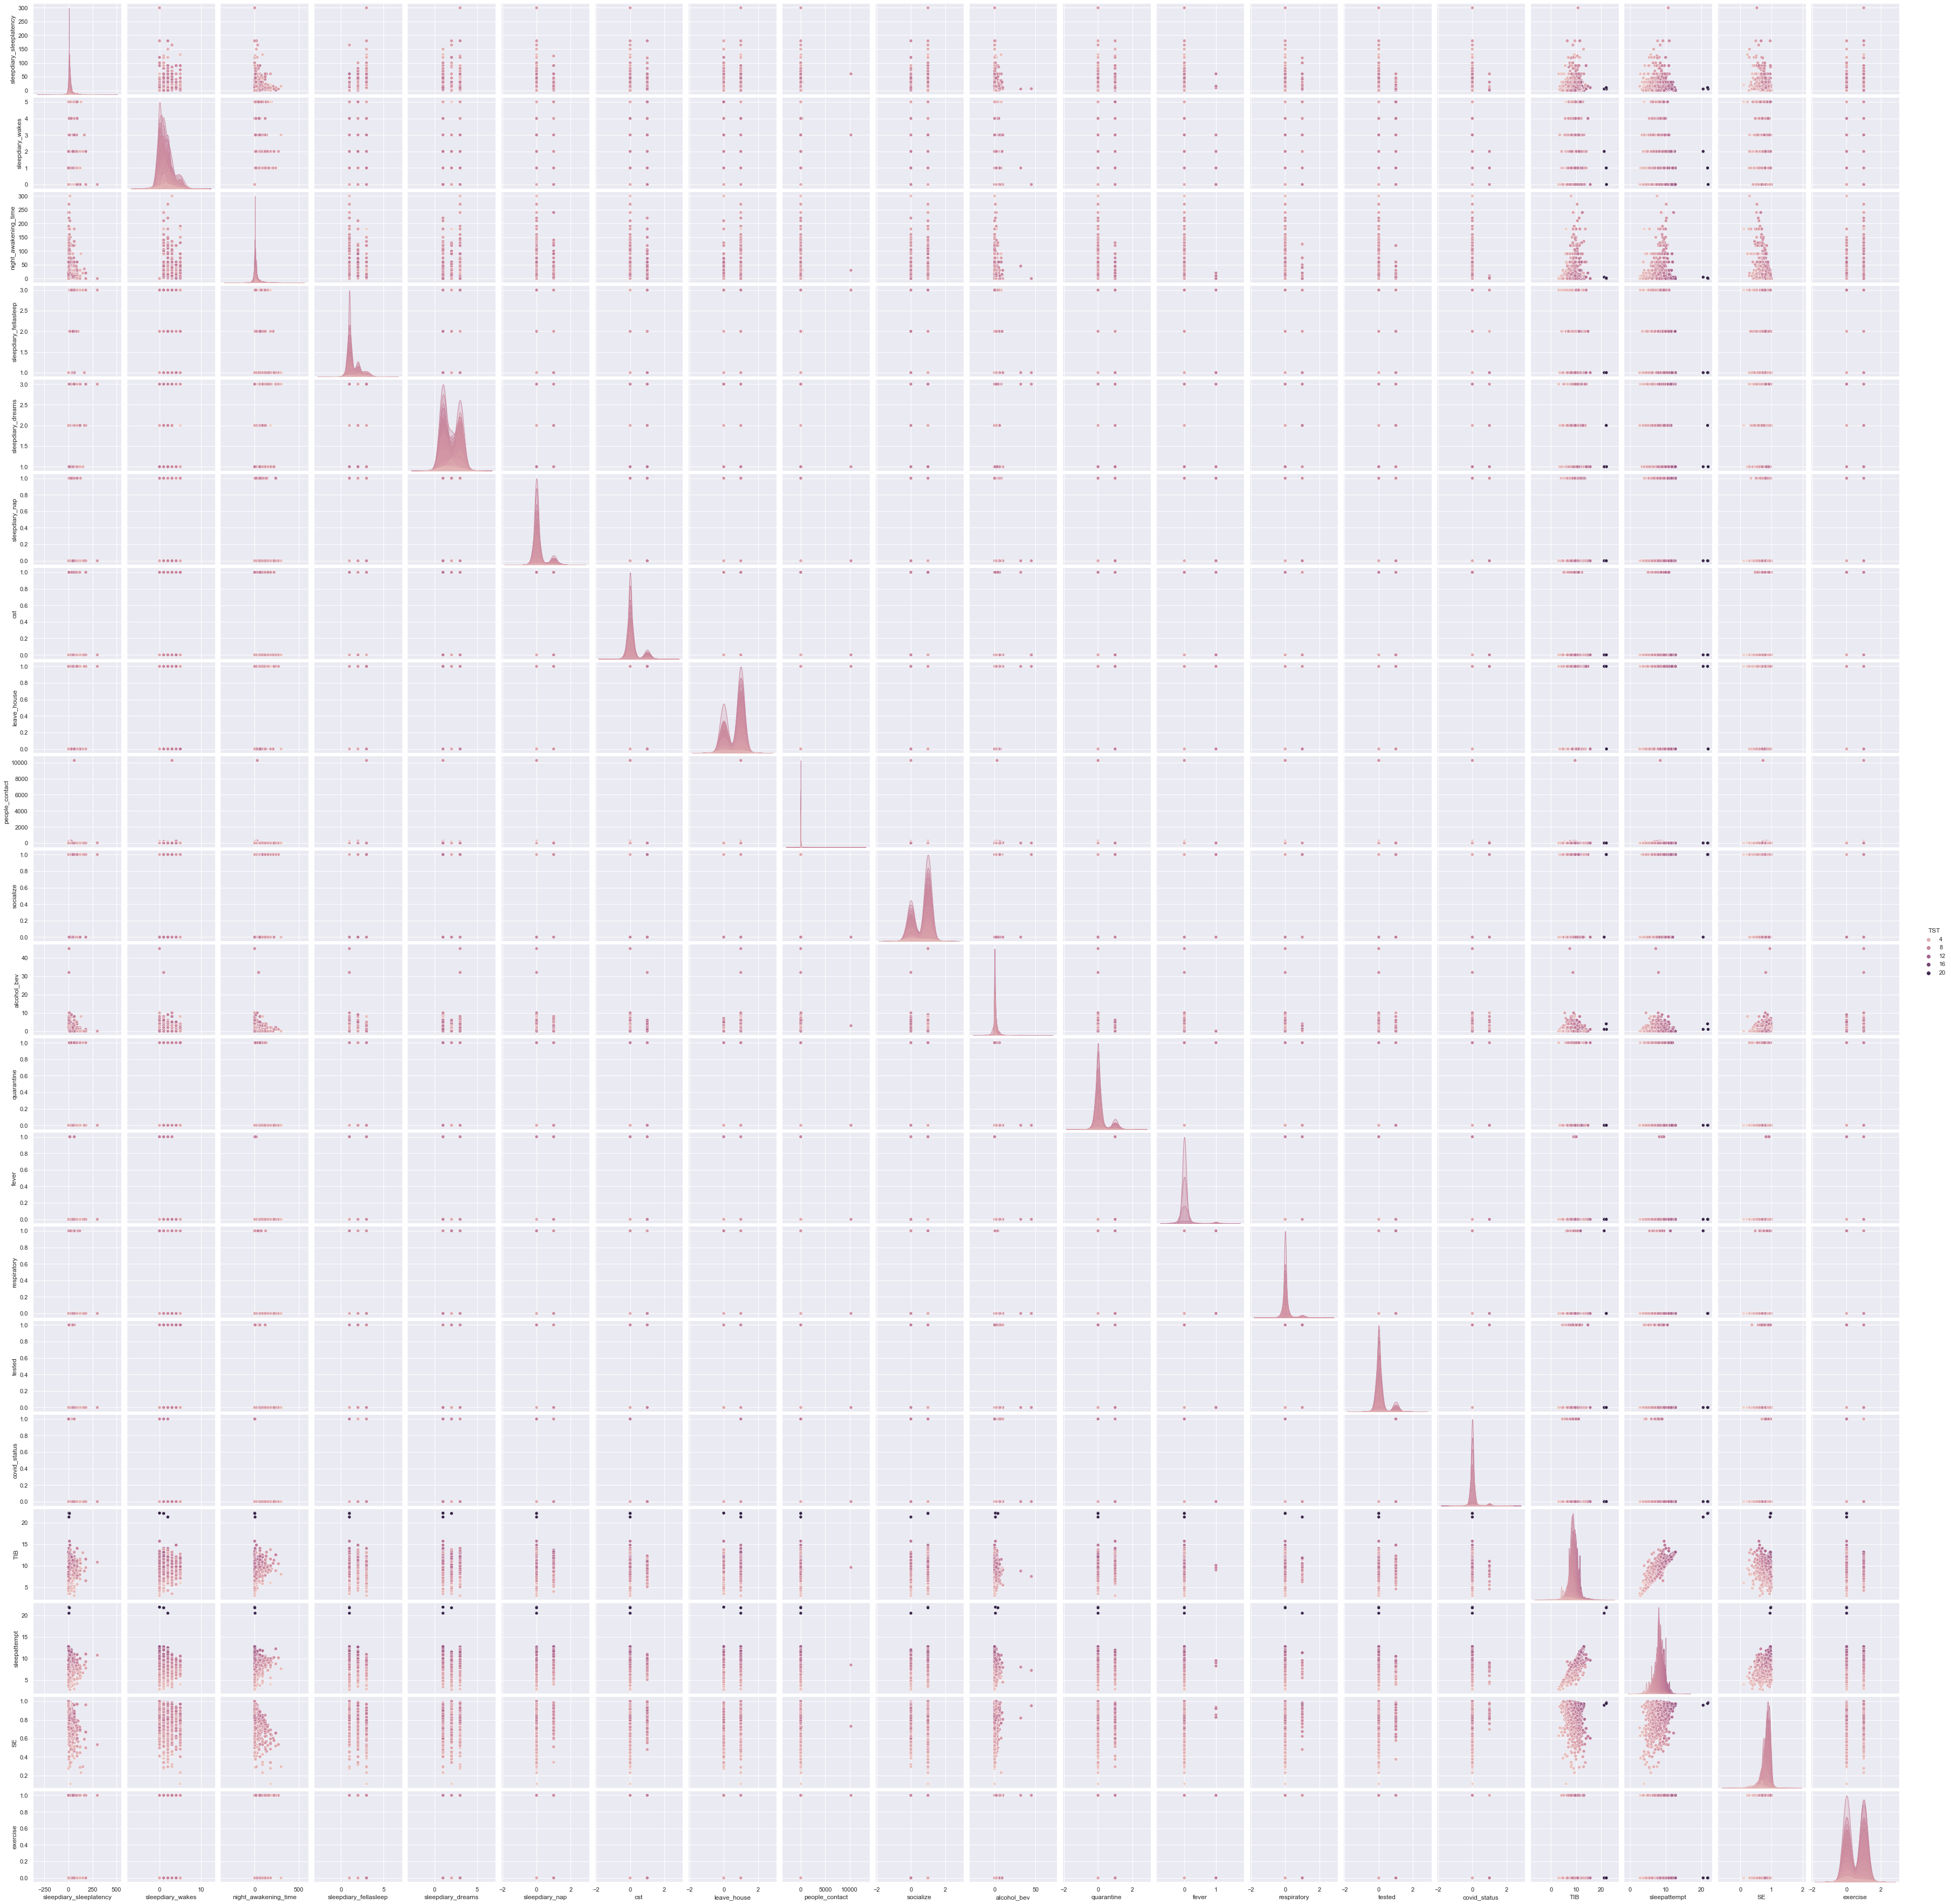

In [275]:
sns.pairplot(data13, hue = 'TST')

# EXPLORATORY DATA ANALYSIS

In [276]:
data13  # visualising the processed data

todays_date  sleepdiary_sleeplatency  sleepdiary_wakes  \
0     3/23/2020 16:11                    15.00               2.0   
1     3/24/2020 10:38                    10.00               1.0   
2     3/25/2020 17:33                    22.00               1.0   
3     3/26/2020 20:18                    30.00               1.0   
4      3/27/2020 9:16                    10.00               0.0   
8     3/31/2020 21:01                    15.00               1.0   
11     4/3/2020 12:08                    20.00               0.0   
14     4/6/2020 22:46                    30.00               5.0   
17     4/9/2020 22:35                    10.00               1.0   
20    4/12/2020 13:38                    10.00               1.0   
23    4/15/2020 13:55                     5.00               2.0   
28    4/20/2020 14:14                    15.00               1.0   
31     4/23/2020 8:45                    10.00               1.0   
34    4/26/2020 10:43                     5.00               0.0   
37    4/29/2020 12:12                     5.00               2.0   
41      5/2/2020 8:25                    20.00               3.0   
44      5/5/2020 8:28                    10.00               1.0   
47      5/8/2020 9:06                    10.00               0.0   
50     5/11/2020 8:57                     5.00               1.0   
54    5/14/2020 15:04                    10.00               2.0   
57    5/17/2020 12:02                    10.00               1.0   
60    5/20/2020 13:23                     5.00               1.0   
61     5/23/2020 8:59                     5.00               2.0   
62    5/26/2020 22:44                     5.00               1.0   
63    5/26/2020 22:48                     5.00               1.0   
64    6/16/2020 13:39                    15.00               1.0   
65    6/19/2020 13:51                    10.00               2.0   
66    6/20/2020 19:28                     5.00               3.0   
67     6/24/2020 7:21                    15.00               1.0   
68     3/22/2020 9:43                    46.00               2.0   
69    3/24/2020 10:27                     5.00               1.0   
70    3/25/2020 15:55                    20.00               1.0   
71    3/26/2020 21:14                     5.00               0.0   
72    3/27/2020 19:44                    10.00               2.0   
77      4/4/2020 7:48                    10.00               1.0   
79      4/6/2020 9:52                    10.00               1.0   
82      4/9/2020 8:35                    20.00               1.0   
85    4/12/2020 10:16                     1.00               0.0   
88     4/15/2020 8:20                     5.00               1.0   
94    4/23/2020 15:57                     5.00               0.0   
101     5/2/2020 8:14                    10.00               0.0   
104    5/5/2020 19:40                    10.00               1.0   
107    5/8/2020 15:33                    40.00               1.0   
112    5/14/2020 8:31                    30.00               1.0   
115   5/17/2020 10:02                    10.00               1.0   
118   5/20/2020 12:35                    10.00               1.0   
119   5/23/2020 16:48                    10.00               2.0   
120    5/29/2020 8:28                     5.00               1.0   
121     6/1/2020 9:53                     5.00               1.0   
122    6/4/2020 18:49                    10.00               1.0   
123    6/11/2020 8:04                     5.00               2.0   
124   6/16/2020 10:31                     5.00               1.0   
125   6/19/2020 13:02                    10.00               0.0   
126   6/20/2020 20:38                    15.00               1.0   
127   6/23/2020 12:10                     1.00               1.0   
128   3/22/2020 10:04                    90.00               4.0   
129    3/21/2020 8:03                     7.00               2.0   
130    3/22/2020 9:13                     5.00               1.0  

In [277]:
data13.info()   # geting the information of the processed data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 4415
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   todays_date              1952 non-null   object 
 1   sleepdiary_sleeplatency  1952 non-null   float64
 2   sleepdiary_wakes         1952 non-null   float64
 3   night_awakening_time     1952 non-null   float64
 4   sleepdiary_fellasleep    1952 non-null   float64
 5   sleepdiary_dreams        1952 non-null   float64
 6   sleepdiary_nap           1952 non-null   float64
 7   cst                      1952 non-null   float64
 8   leave_house              1952 non-null   float64
 9   people_contact           1952 non-null   float64
 10  socialize                1952 non-null   float64
 11  alcohol_bev              1952 non-null   float64
 12  quarantine               1952 non-null   float64
 13  fever                    1952 non-null   float64
 14  respiratory             

In [278]:
data13.describe()   # getting the statistical description of the processed data     

sleepdiary_sleeplatency  sleepdiary_wakes  night_awakening_time  \
count              1952.000000       1952.000000           1952.000000   
mean                 14.574933          1.340676             14.993663   
std                  19.236200          1.233076             28.840441   
min                   0.000000          0.000000              0.000000   
25%                   5.000000          0.000000              0.000000   
50%                  10.000000          1.000000              5.000000   
75%                  15.000000          2.000000             15.000000   
max                 300.000000          5.000000            300.000000   

       sleepdiary_fellasleep  sleepdiary_dreams  sleepdiary_nap          cst  \
count            1952.000000        1952.000000     1952.000000  1952.000000   
mean                1.343750           1.940061        0.152152     0.119877   
std                 0.598282           0.927397        0.359260     0.324901   
min                 1.000000           1.000000        0.000000     0.000000   
25%                 1.000000           1.000000        0.000000     0.000000   
50%                 1.000000           2.000000        0.000000     0.000000   
75%                 2.000000           3.000000        0.000000     0.000000   
max                 3.000000           3.000000        1.000000     1.000000   

       leave_house  people_contact    socialize  alcohol_bev   quarantine  \
count  1952.000000     1952.000000  1952.000000  1952.000000  1952.000000   
mean      0.670594       10.437500     0.683914     0.803279     0.115779   
std       0.470118      232.977707     0.465066     1.796807     0.320041   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.000000        0.000000     0.000000     0.000000     0.000000   
50%       1.000000        0.000000     1.000000     0.000000     0.000000   
75%       1.000000        3.000000     1.000000     1.000000     0.000000   
max       1.000000    10269.000000     1.000000    45.000000     1.000000   

             fever  respiratory       tested  covid_status          TIB  \
count  1952.000000  1952.000000  1952.000000   1952.000000  1952.000000   
mean      0.002049     0.035348     0.060963      0.008197     8.999010   
std       0.045233     0.184706     0.239324      0.090187     1.535872   
min       0.000000     0.000000     0.000000      0.000000     3.050000   
25%       0.000000     0.000000     0.000000      0.000000     8.083333   
50%       0.000000     0.000000     0.000000      0.000000     9.000000   
75%       0.000000     0.000000     0.000000      0.000000     9.833333   
max       1.000000     1.000000     1.000000      1.000000    22.166667   

       sleepattempt          TST           SE     exercise  
count   1952.000000  1952.000000  1952.000000  1952.000000  
mean       8.082898     7.590088     0.846975     0.525102  
std        1.420251     1.489306     0.110083     0.499497  
min        2.750000     0.666667     0.111111     0.000000  
25%        7.333333     6.833333     0.794872     0.000000  
50%        8.058333     7.666667     0.870135     1.000000  
75%        8.916667     8.416667     0.925000     1.000000  
max       21.900000    21.816667     1.000000     1.000000

In [279]:
data13['todays_date'] = pd.to_datetime(data13['todays_date'])  # changing the dtype of the date column into datetime format

Text(0.5, 1.0, 'Line plot between SE and todays_date')

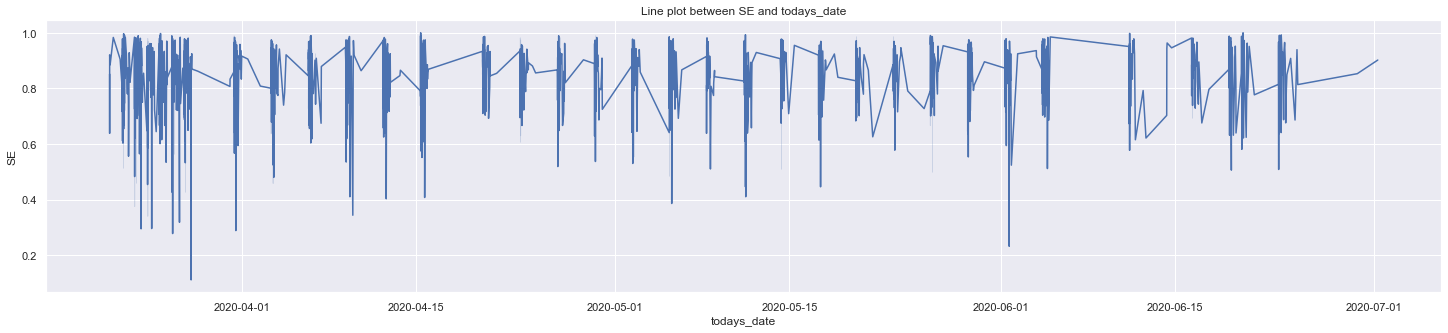

In [280]:
plt.subplots(1, 1, figsize=(25, 5))    # plotting line plot of SE accordating to the time series
sns.lineplot(x='todays_date', y='SE', data=data13)
plt.title("Line plot between SE and todays_date")

In [281]:
plt.subplots(1, 1, figsize=(25, 5))    # plotting line plot of SE accordating to the time series
sns.lineplot(x='todays_date', y='covid_status', data=data13)
plt.title("Line plot between SE and todays_date")

Text(0.5, 1.0, 'Line plot between SE and todays_date')

In [282]:
features=[features for features in data13.columns if data13[features].dtypes !="O"]   #looking for numericle features
print(features)

['todays_date', 'sleepdiary_sleeplatency', 'sleepdiary_wakes', 'night_awakening_time', 'sleepdiary_fellasleep', 'sleepdiary_dreams', 'sleepdiary_nap', 'cst', 'leave_house', 'people_contact', 'socialize', 'alcohol_bev', 'quarantine', 'fever', 'respiratory', 'tested', 'covid_status', 'TIB', 'sleepattempt', 'TST', 'SE', 'exercise']


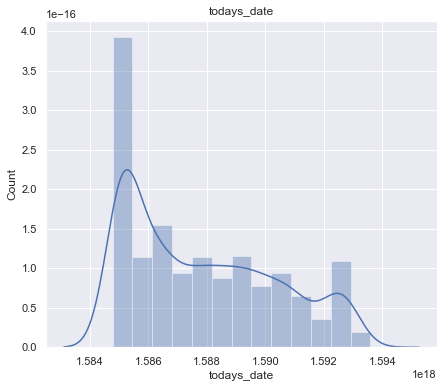

<Figure size 504x288 with 0 Axes>

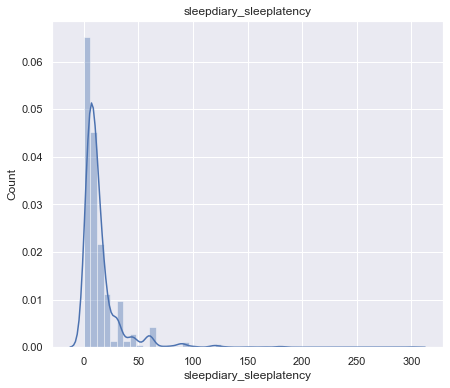

<Figure size 504x288 with 0 Axes>

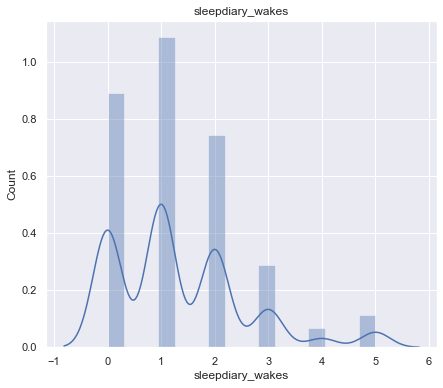

<Figure size 504x288 with 0 Axes>

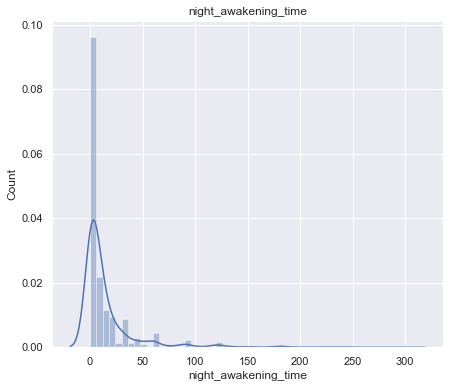

<Figure size 504x288 with 0 Axes>

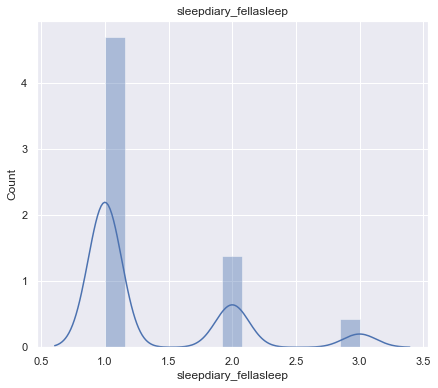

<Figure size 504x288 with 0 Axes>

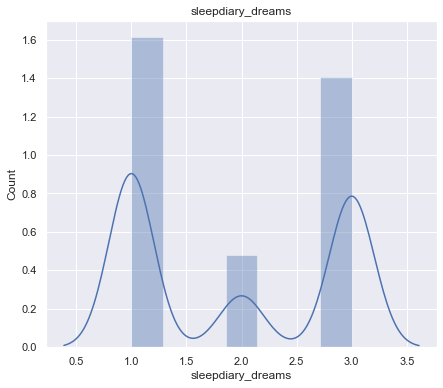

<Figure size 504x288 with 0 Axes>

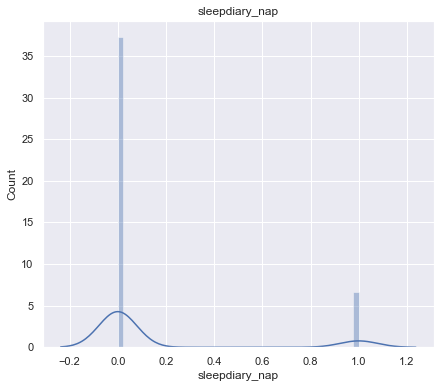

<Figure size 504x288 with 0 Axes>

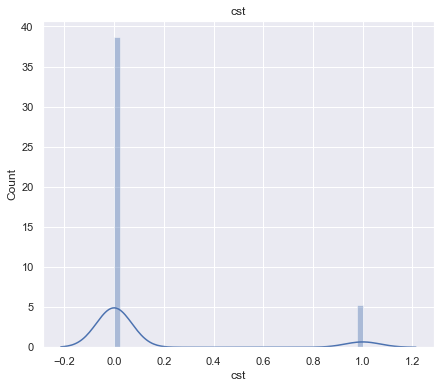

<Figure size 504x288 with 0 Axes>

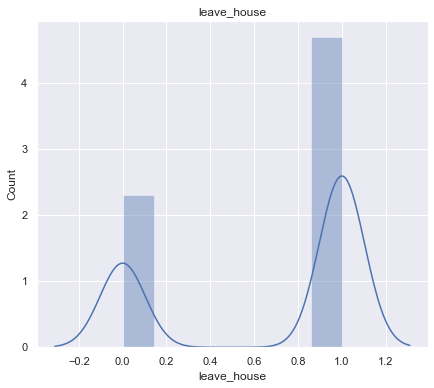

<Figure size 504x288 with 0 Axes>

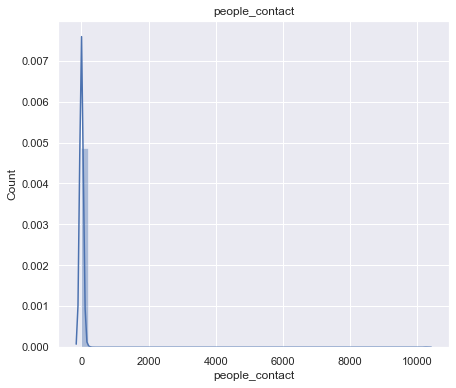

<Figure size 504x288 with 0 Axes>

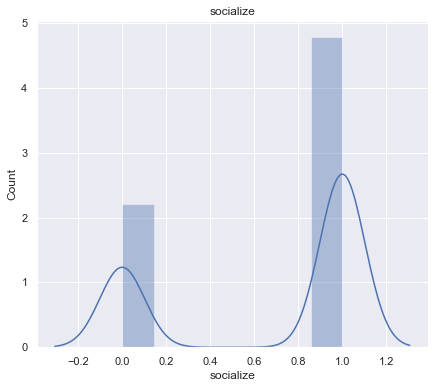

<Figure size 504x288 with 0 Axes>

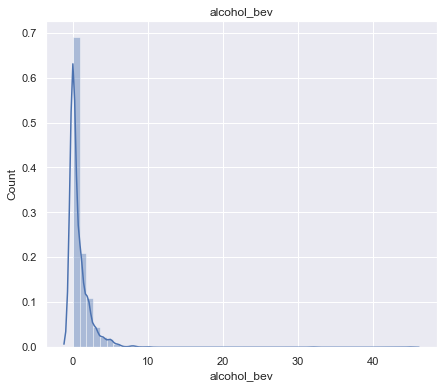

<Figure size 504x288 with 0 Axes>

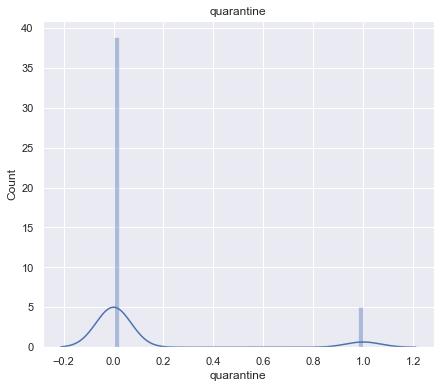

<Figure size 504x288 with 0 Axes>

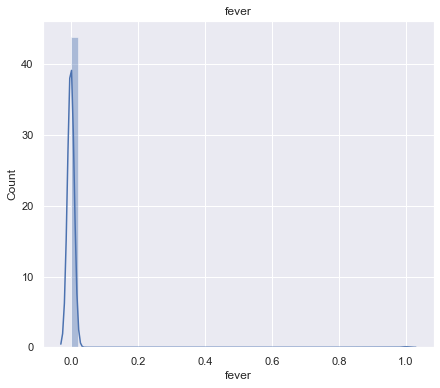

<Figure size 504x288 with 0 Axes>

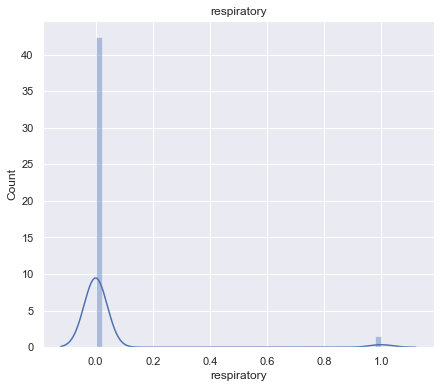

<Figure size 504x288 with 0 Axes>

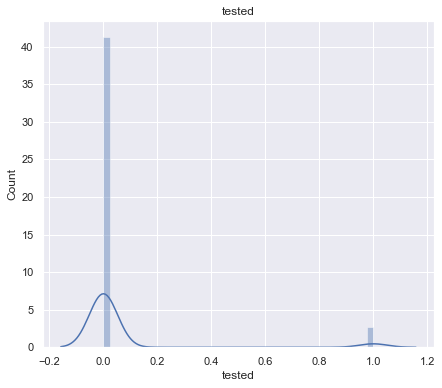

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

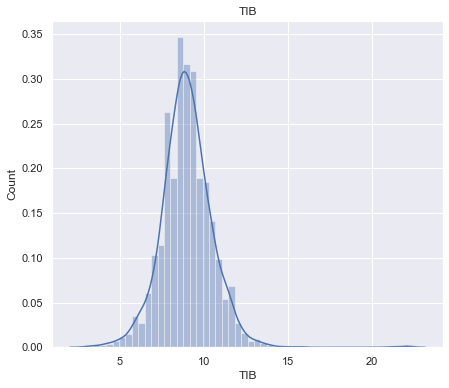

<Figure size 504x288 with 0 Axes>

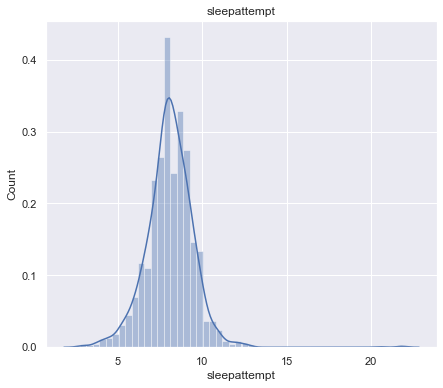

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [284]:
for feature in features:           #plotting distribution of features for model to check whether it is gaussian/ normal distribution
    data13=data13.copy()
    sns.distplot(data13[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(7,4))
    plt.show()

In [285]:
plt.figure(figsize=(7,4))
plt.title("Barplot between covid status and tested")
sns.barplot(data=data13,y='covid_status',x='tested')

<AxesSubplot:title={'center':'Barplot between covid status and tested'}, xlabel='tested', ylabel='covid_status'>

<AxesSubplot:title={'center':'Barplot between SE and tested'}, xlabel='tested', ylabel='SE'>

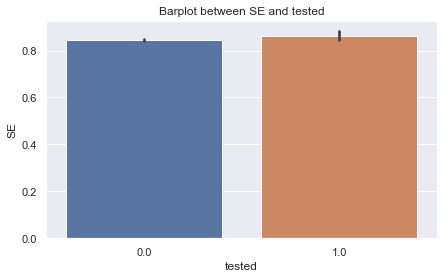

In [286]:
plt.figure(figsize=(7,4))
plt.title("Barplot between SE and tested")
sns.barplot(data=data13,y='SE',x='tested')

<AxesSubplot:title={'center':'Barplot between sleepdiary_sleeplatency and SE'}, xlabel='sleepdiary_sleeplatency', ylabel='SE'>

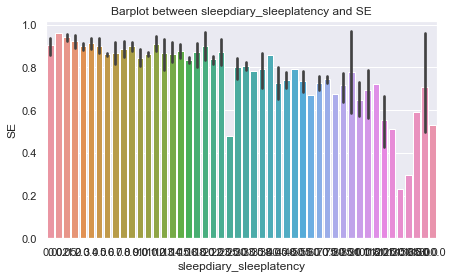

In [287]:
plt.figure(figsize=(7,4))
plt.title("Barplot between sleepdiary_sleeplatency and SE")
sns.barplot(data=data13,y='SE',x='sleepdiary_sleeplatency')

<AxesSubplot:title={'center':'Barplot between sleepdiary_sleeplatency and SE'}, xlabel='sleepdiary_sleeplatency', ylabel='covid_status'>

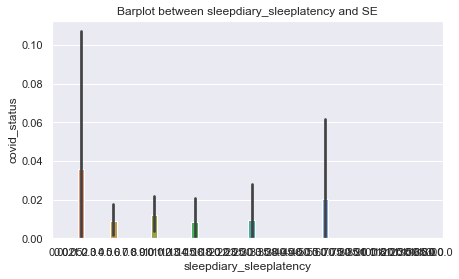

In [288]:
plt.figure(figsize=(7,4))
plt.title("Barplot between sleepdiary_sleeplatency and SE")
sns.barplot(data=data13,y='covid_status',x='sleepdiary_sleeplatency')

<AxesSubplot:title={'center':'Barplot between sleepdiary_wakesand SE'}, xlabel='sleepdiary_wakes', ylabel='SE'>

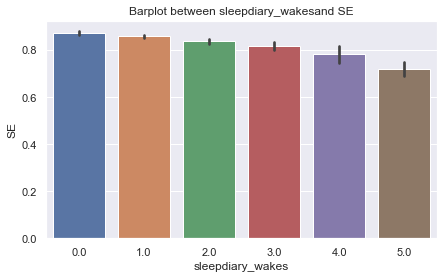

In [289]:
plt.figure(figsize=(7,4))
plt.title("Barplot between sleepdiary_wakesand SE")
sns.barplot(data=data13,y='SE',x='sleepdiary_wakes')

<AxesSubplot:title={'center':'Barplot between sleepdiary_wakesand SE'}, xlabel='sleepdiary_wakes', ylabel='covid_status'>

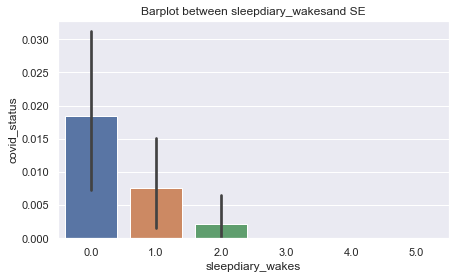

In [290]:
plt.figure(figsize=(7,4))
plt.title("Barplot between sleepdiary_wakesand SE")
sns.barplot(data=data13,y='covid_status',x='sleepdiary_wakes')

<AxesSubplot:title={'center':'Barplot between alcohol_bev and SE'}, xlabel='alcohol_bev', ylabel='SE'>

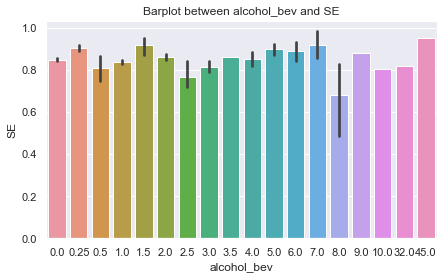

In [291]:
plt.figure(figsize=(7,4))
plt.title("Barplot between alcohol_bev and SE")
sns.barplot(data=data13,y='SE',x='alcohol_bev')

<AxesSubplot:title={'center':'Barplot between alcohol_bev and SE'}, xlabel='alcohol_bev', ylabel='covid_status'>

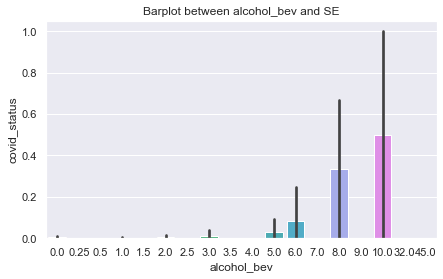

In [292]:
plt.figure(figsize=(7,4))
plt.title("Barplot between alcohol_bev and SE")
sns.barplot(data=data13,y='covid_status',x='alcohol_bev')

<AxesSubplot:title={'center':'Barplot between socialize and SE'}, xlabel='socialize', ylabel='SE'>

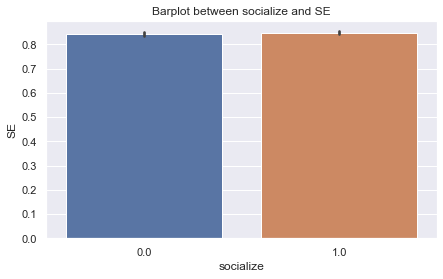

In [293]:
plt.figure(figsize=(7,4))
plt.title("Barplot between socialize and SE")
sns.barplot(data=data13,y='SE',x='socialize')

<AxesSubplot:title={'center':'Barplot between socialize and SE'}, xlabel='socialize', ylabel='covid_status'>

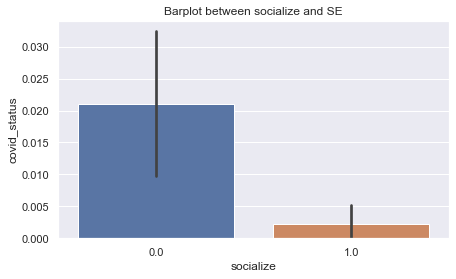

In [294]:
plt.figure(figsize=(7,4))
plt.title("Barplot between socialize and SE")
sns.barplot(data=data13,y='covid_status',x='socialize')

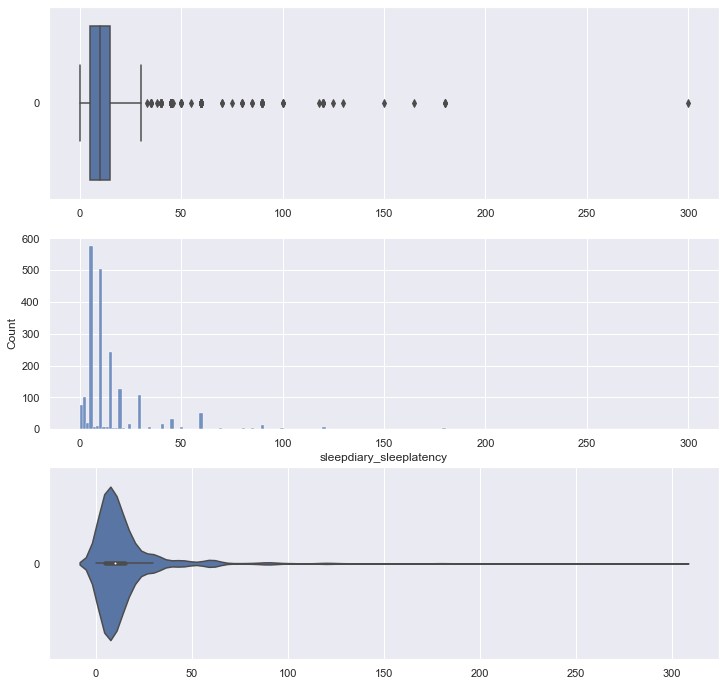

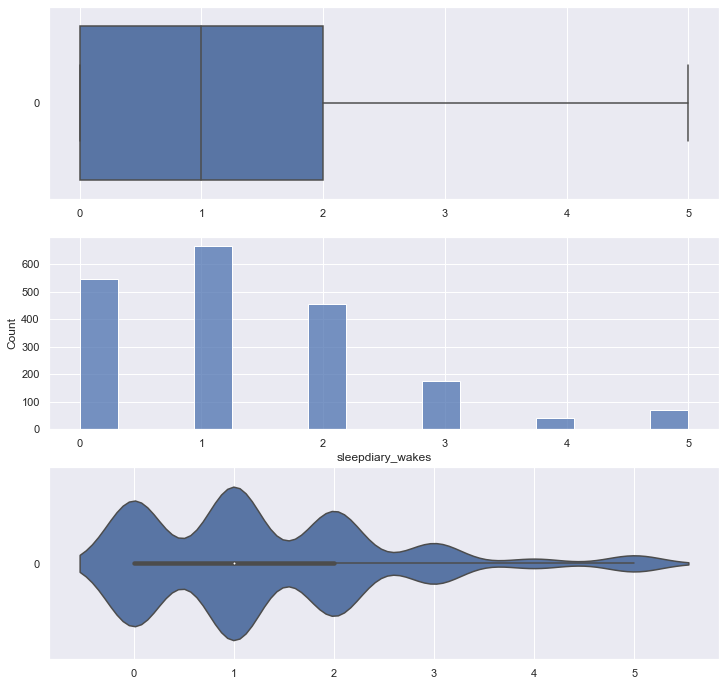

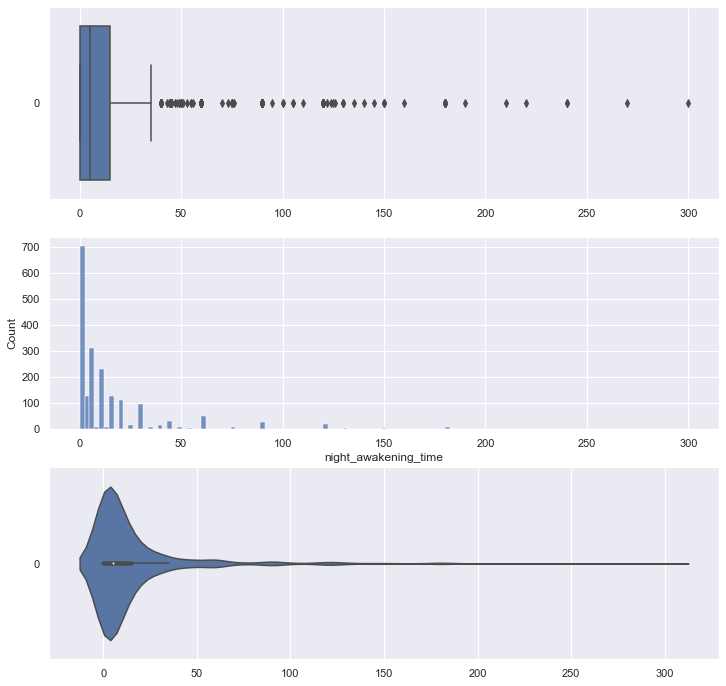

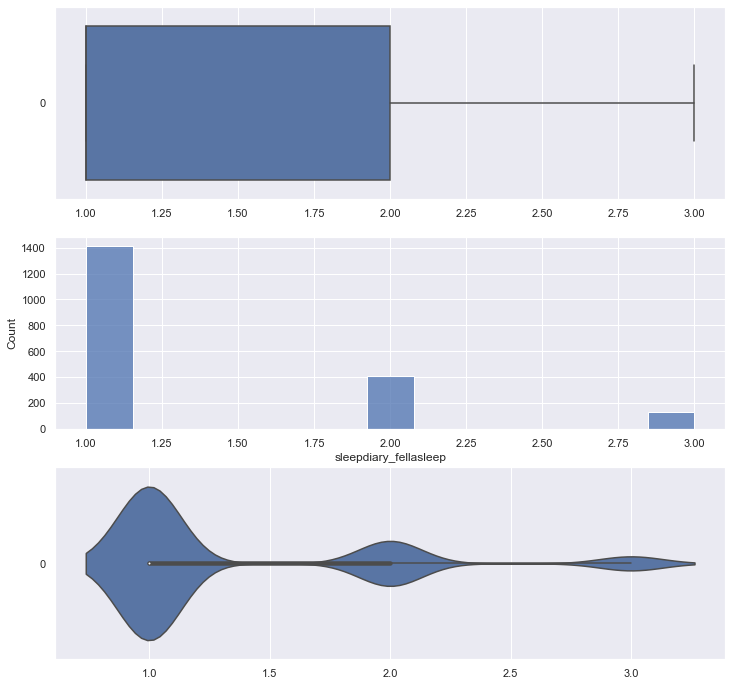

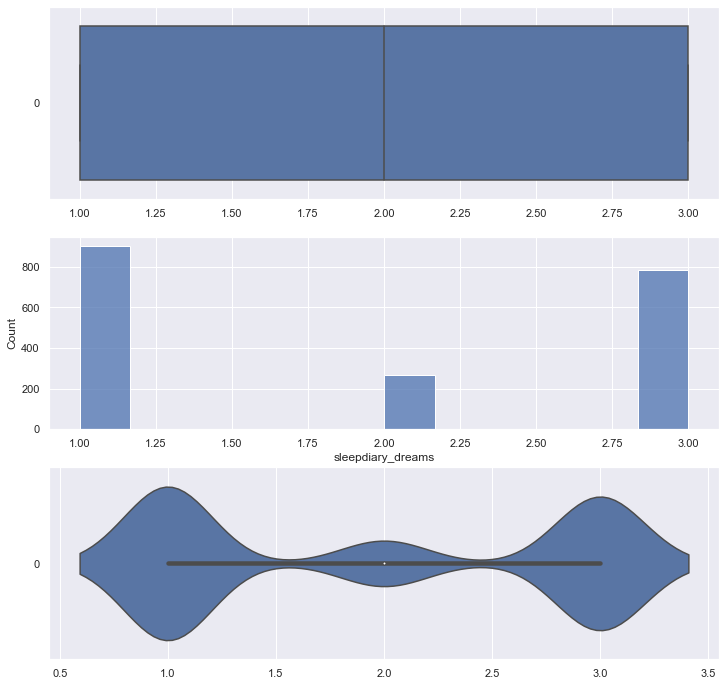

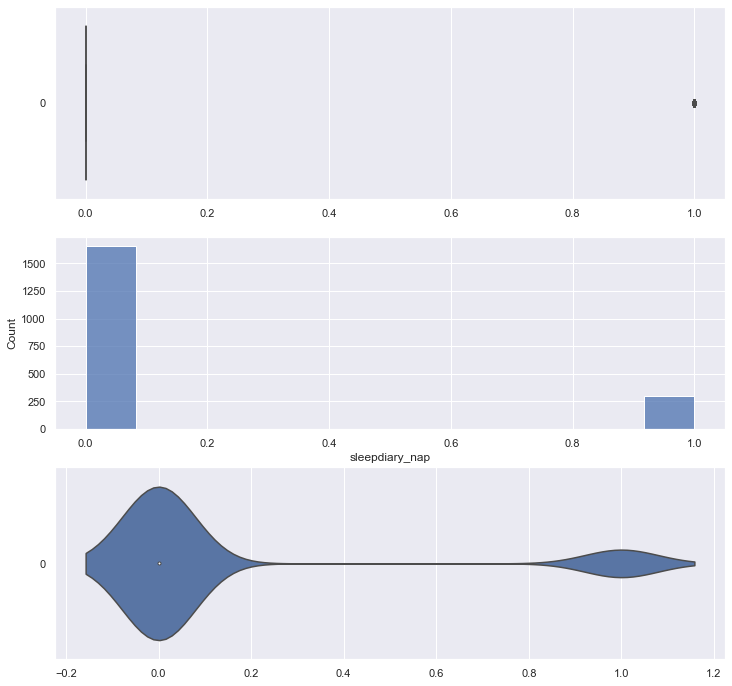

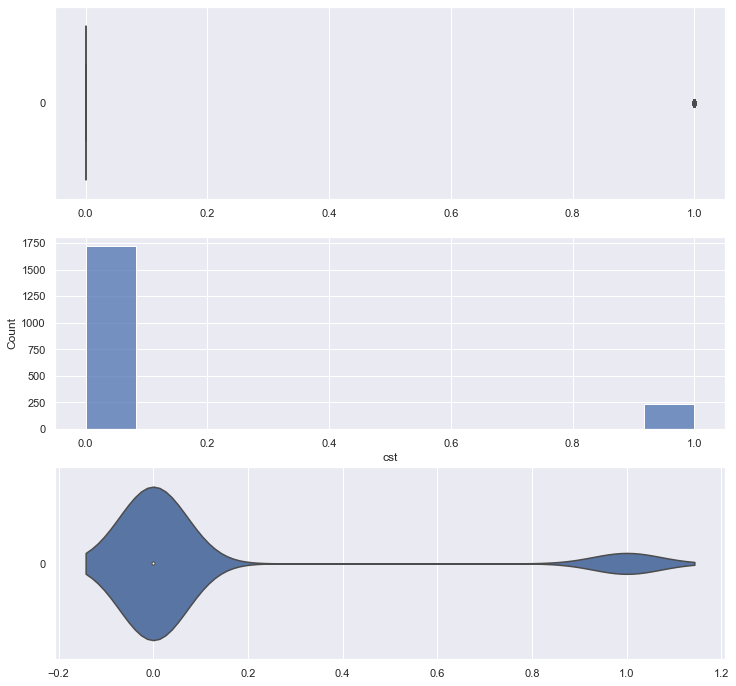

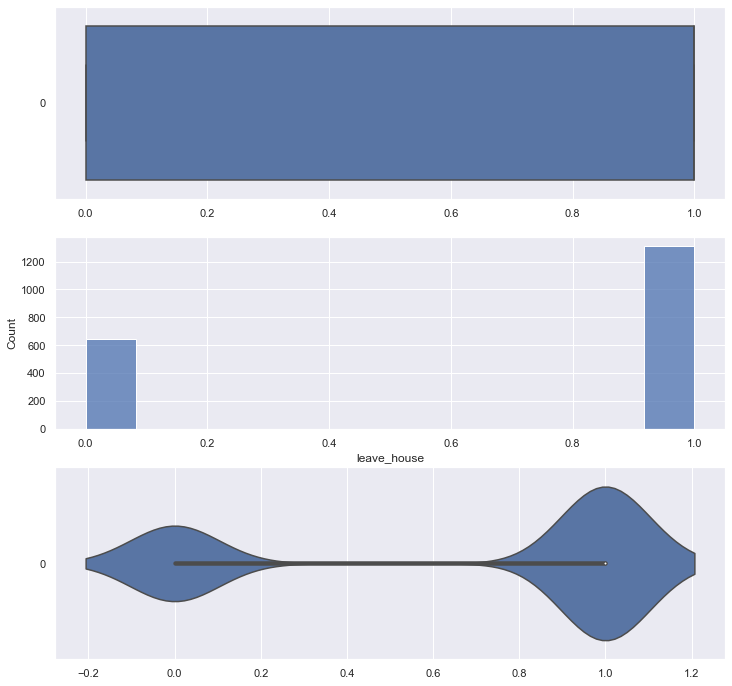

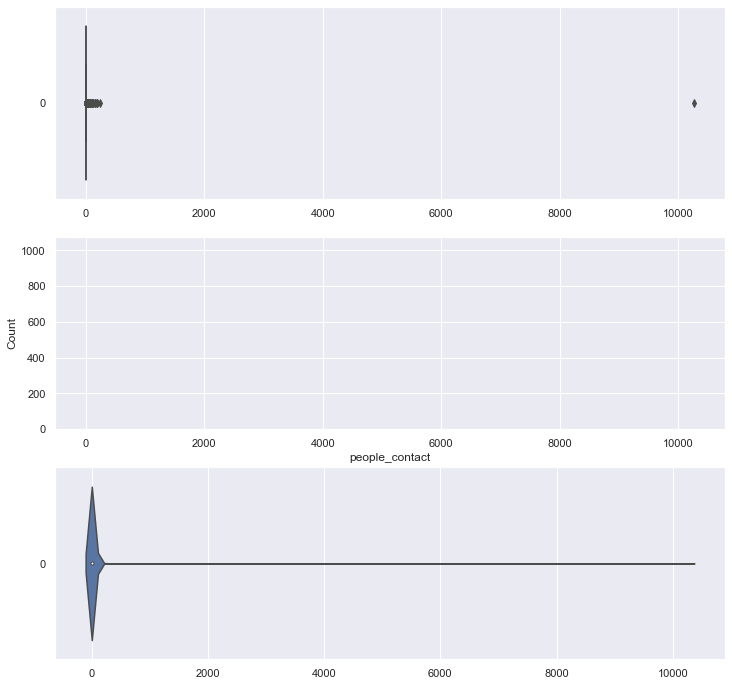

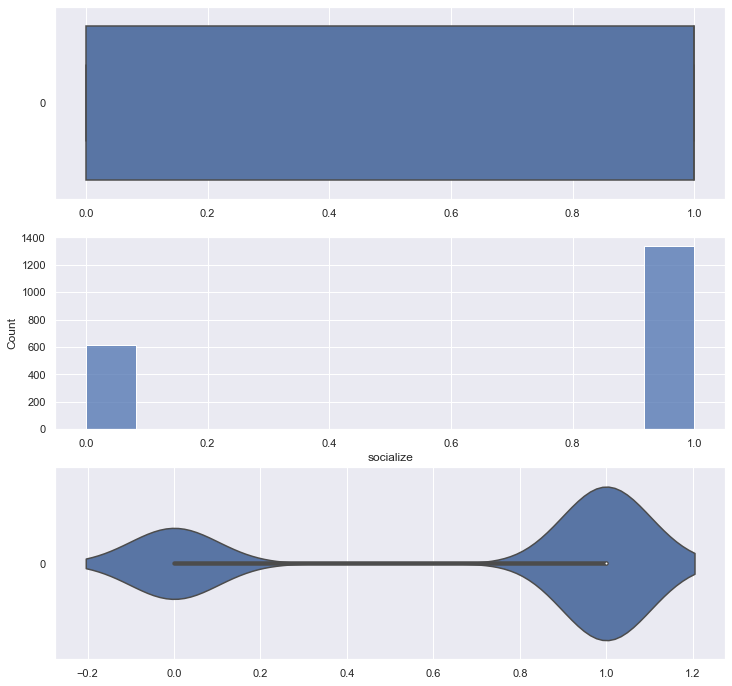

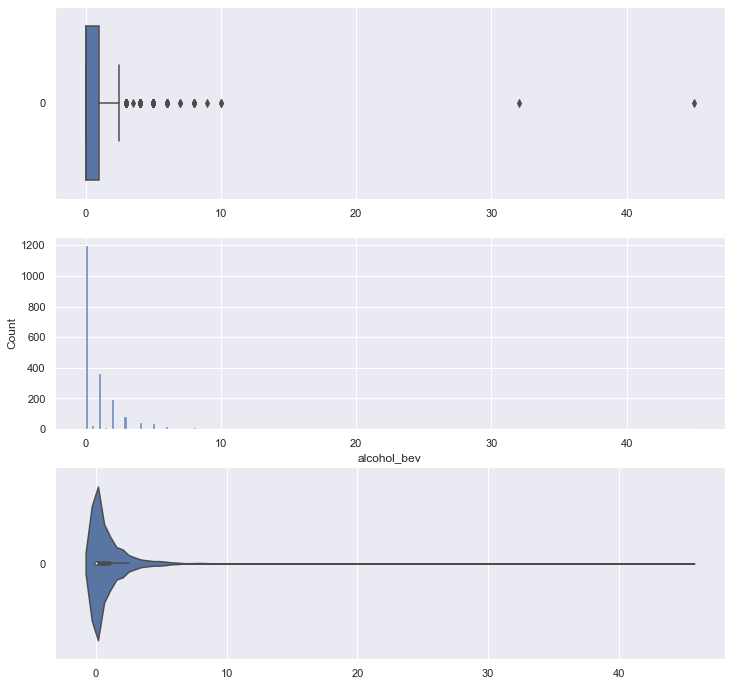

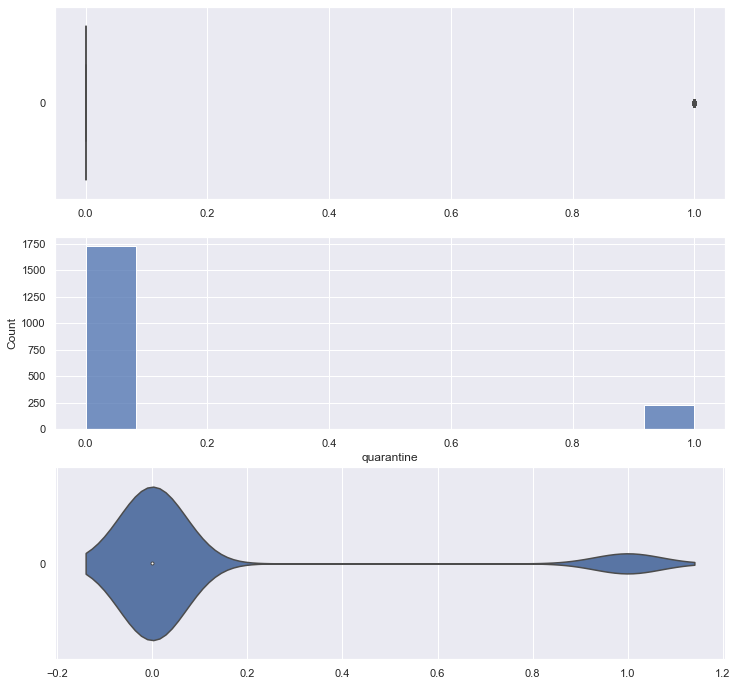

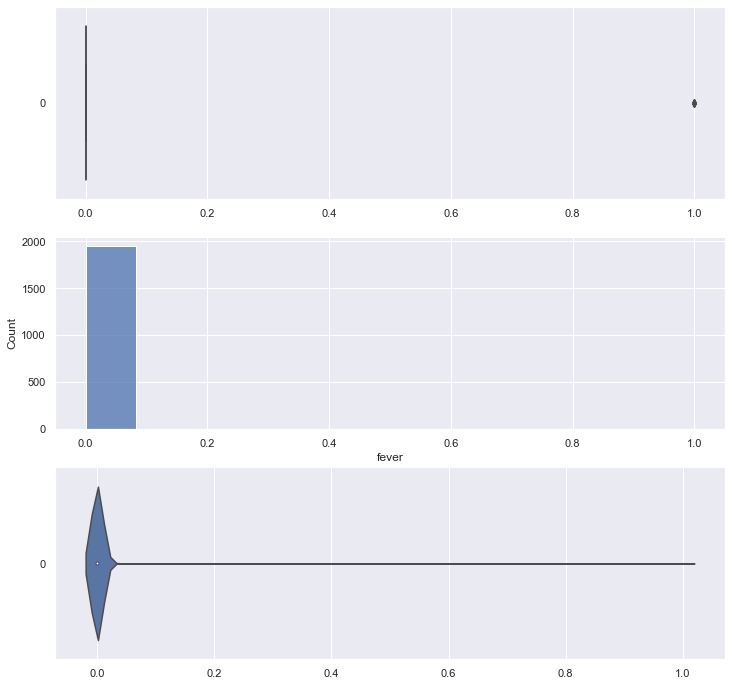

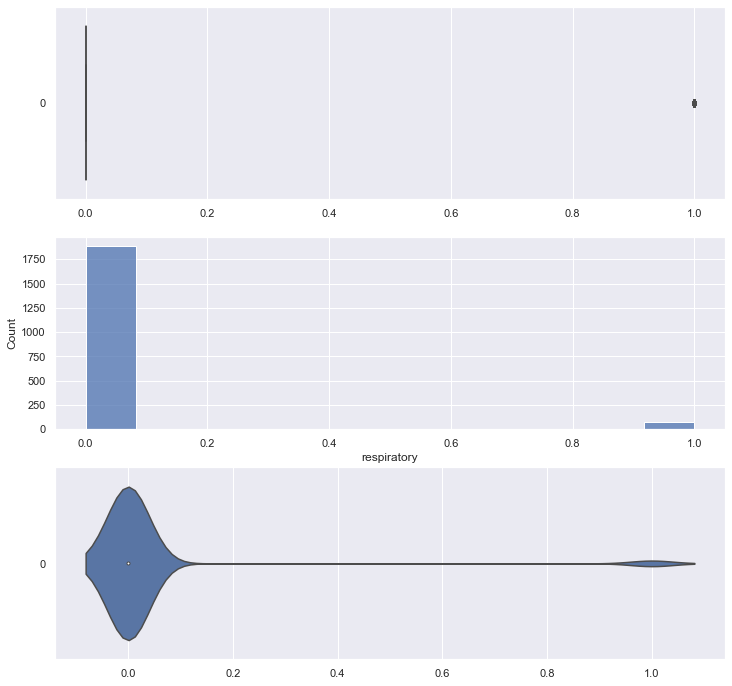

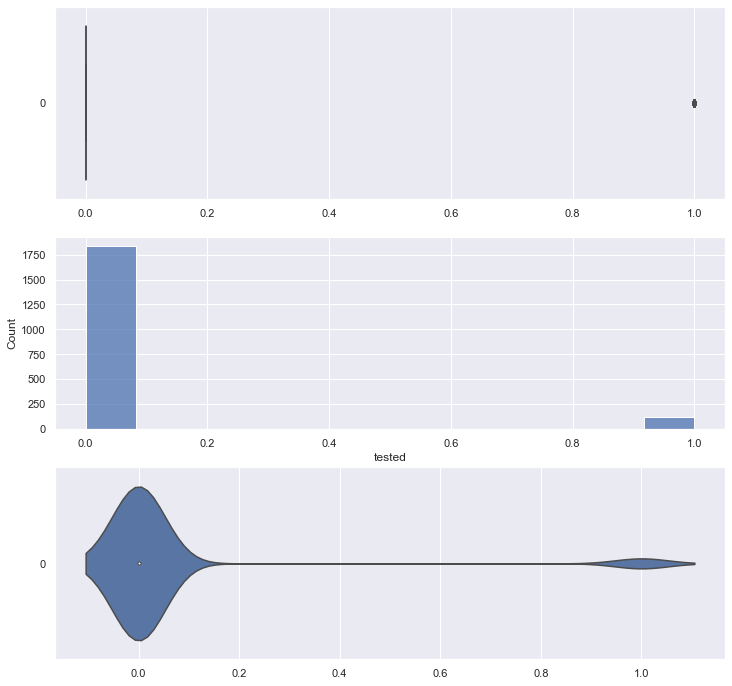

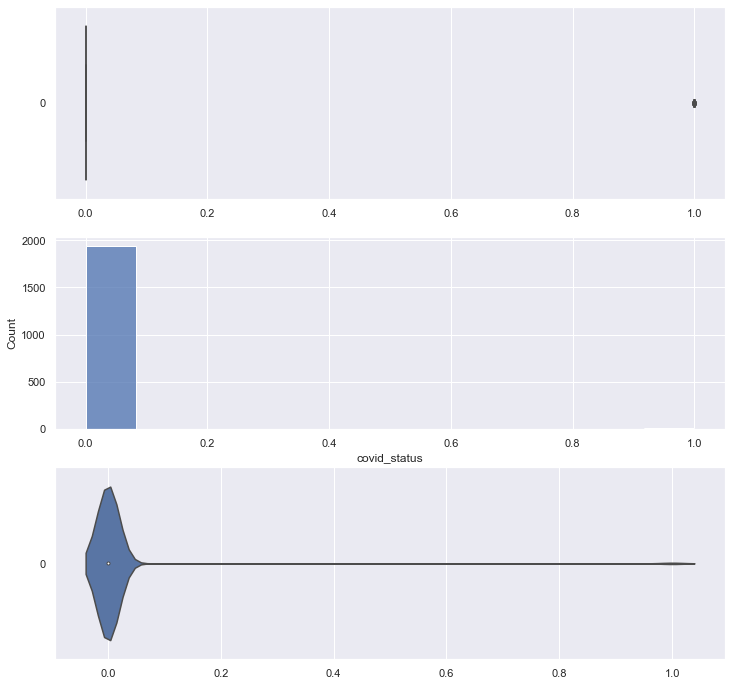

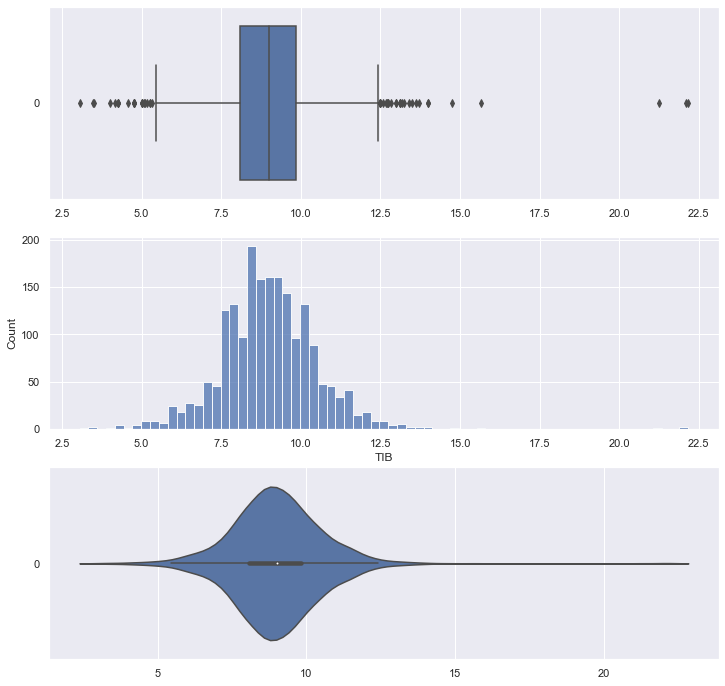

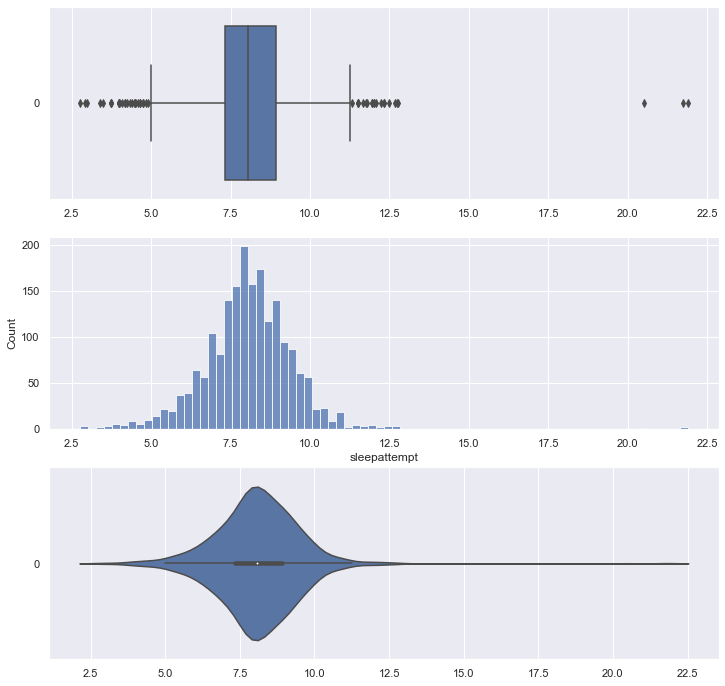

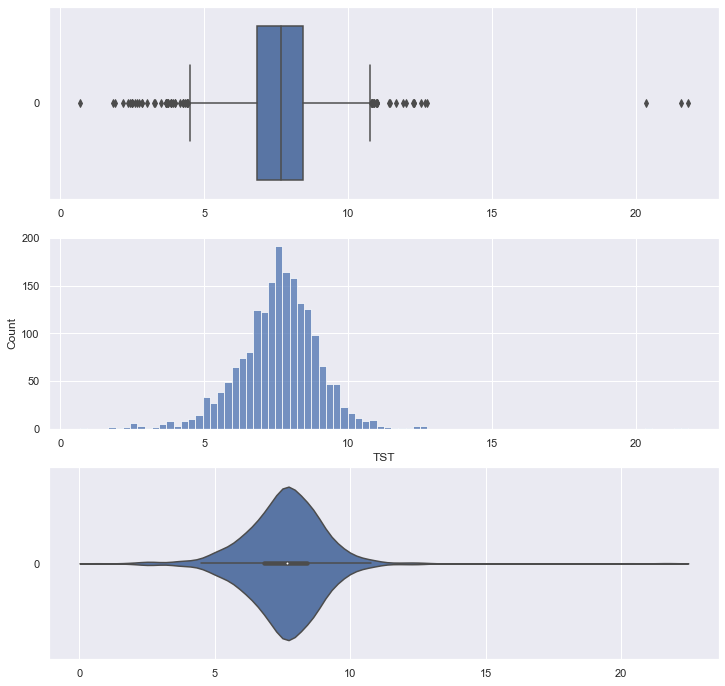

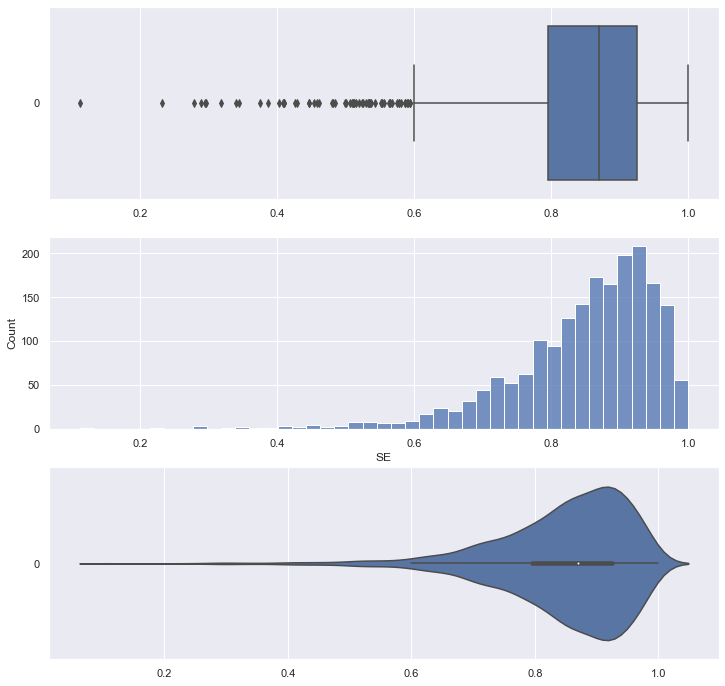

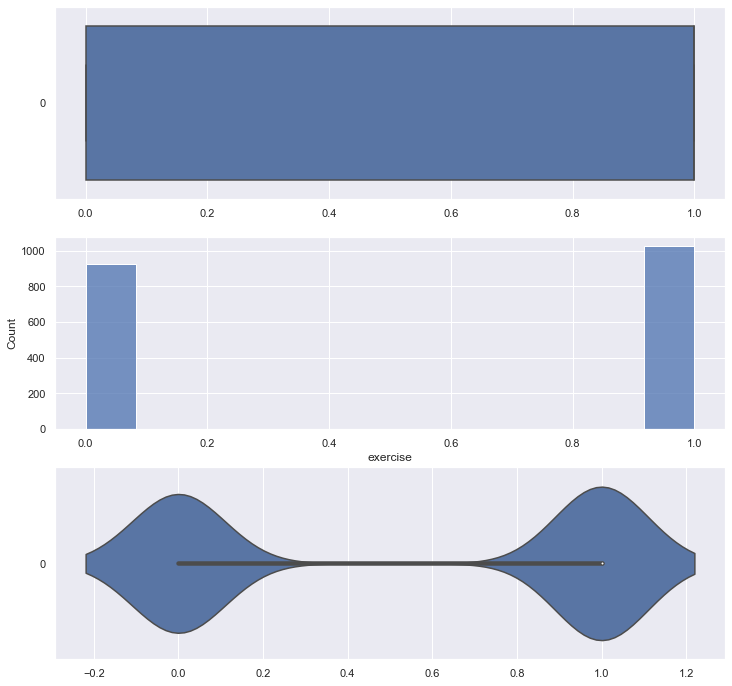

In [295]:
feature=['sleepdiary_sleeplatency', 'sleepdiary_wakes', 'night_awakening_time', 'sleepdiary_fellasleep', 'sleepdiary_dreams', 
         'sleepdiary_nap', 'cst', 'leave_house', 'people_contact', 'socialize', 'alcohol_bev',
         'quarantine', 'fever', 'respiratory', 'tested', 'covid_status', 'TIB', 'sleepattempt', 'TST', 'SE', 'exercise']
for i in feature:  # outliers, counting , data skewing analysis for all variables in the data
    f, axes = plt.subplots(3, 1, figsize=(12, 12))
    sns.boxplot(data = data13[i], orient = "h", ax = axes[0])   # boxplot for outliers analysis
    sns.histplot(data = data13[i], ax = axes[1])                # countng the values 
    sns.violinplot(data = data13[i], orient = "h", ax = axes[2])

<a id="5"></a>
    
<font size="+2" color="indigo"><b>Data Cleansing && Processing</b></font><br>

In [296]:
## Dropping columns containing large percentage of missing values
data=data.replace({'':np.nan})
data1 = data.dropna(thresh=0.7*len(data), axis=1)

In [297]:
# checking for null values the data in each column
data1.isnull().sum() 

unique_id                     0
record_id                     0
redcap_repeat_instrument      0
redcap_repeat_instance        0
sub_id                        0
todays_date                   0
sleepdiary_bedtime            1
sleepdiary_fallasleep         3
sleepdiary_sleeplatency      21
sleepdiary_wakes              3
night_awakening_time         16
sleepdiary_waketime           9
sleepdiary_outofbed           8
sleepdiary_dreams             6
sleepdiary_nap               10
sleepdiary_naptime           11
cst                          11
step_counter                  4
leave_house                   7
people_contact               29
socialize                     4
socialize_min                13
alcohol_bev                  34
quarantine                    7
fever                        10
respiratory                   7
tested                        5
covid_status                 22
stress                        4
redcap_timestamp              0
ref_date                     87
days_ela

In [298]:
#checking dataset size before && After dropping features with more missing values 
print("Before dropping Missing features dataset size",data.shape)
print("After dropping Missing features dataset size",data1.shape)

Before dropping Missing features dataset size (4417, 100)
After dropping Missing features dataset size (4417, 39)


In [299]:
# split features into Categorical and Numerical 
catogrical = [x for x in data1.columns if data1[x].dtype == "object"]
numeric = [x for x in data1.columns if data1[x].dtype == "float64"]
#filling null or missing values with more frequent values
for i in catogrical:
    data1[i].fillna(data1[i].mode()[0], inplace=True)
# filling null or missing values with mean or average 

for i in numeric:
    data1[i].fillna(data1[i].mean(), inplace = True)

In [300]:
# checking for null values the data in each column
data1.isnull().sum() 

unique_id                   0
record_id                   0
redcap_repeat_instrument    0
redcap_repeat_instance      0
sub_id                      0
todays_date                 0
sleepdiary_bedtime          0
sleepdiary_fallasleep       0
sleepdiary_sleeplatency     0
sleepdiary_wakes            0
night_awakening_time        0
sleepdiary_waketime         0
sleepdiary_outofbed         0
sleepdiary_dreams           0
sleepdiary_nap              0
sleepdiary_naptime          0
cst                         0
step_counter                0
leave_house                 0
people_contact              0
socialize                   0
socialize_min               0
alcohol_bev                 0
quarantine                  0
fever                       0
respiratory                 0
tested                      0
covid_status                0
stress                      0
redcap_timestamp            0
ref_date                    0
days_elapsed                0
TIB                         0
TIB_12    

In [301]:
data1.head()

unique_id  record_id redcap_repeat_instrument  redcap_repeat_instance  \
0      218L        218                  covid19                       1   
1      341L        341                  covid19                       1   
2      612L        612                  covid19                       1   
3      855L        855                  covid19                       1   
4      954L        954                  covid19                       1   

   sub_id      todays_date sleepdiary_bedtime sleepdiary_fallasleep  \
0       1  3/23/2020 16:11              22:30                 23:00   
1       1  3/24/2020 10:38              23:00                 23:15   
2       1  3/25/2020 17:33              22:30                 22:30   
3       1  3/26/2020 20:18              22:30                 23:00   
4       1   3/27/2020 9:16              23:30                 23:30   

   sleepdiary_sleeplatency  sleepdiary_wakes  night_awakening_time  \
0                     15.0               2.0                   7.0   
1                     10.0               1.0                   3.0   
2                     22.0               1.0                   2.0   
3                     30.0               1.0                   3.0   
4                     10.0               0.0                   0.0   

  sleepdiary_waketime sleepdiary_outofbed  sleepdiary_dreams  sleepdiary_nap  \
0                4:30                4:35                2.0             0.0   
1                7:00                7:00                3.0             0.0   
2                4:30                4:30                3.0             0.0   
3                6:45                7:00                1.0             0.0   
4                5:45                5:50                3.0             0.0   

   sleepdiary_naptime  cst  step_counter  leave_house  people_contact  \
0                 0.0  0.0           0.0          0.0             1.0   
1                 0.0  0.0           0.0          1.0             2.0   
2                 0.0  0.0           0.0          1.0             2.0   
3                 0.0  0.0           0.0          1.0             3.0   
4                 0.0  0.0           0.0          1.0             4.0   

   socialize  socialize_min  alcohol_bev  quarantine  fever  respiratory  \
0        1.0           20.0          0.0         0.0    0.0          0.0   
1        1.0           20.0          0.0         0.0    0.0          0.0   
2        1.0           40.0          0.0         0.0    0.0          0.0   
3        1.0           60.0          0.0         0.0    0.0          0.0   
4        1.0           30.0          0.0         0.0    0.0          0.0   

   tested  covid_status  stress redcap_timestamp   ref_date  days_elapsed  \
0     0.0           0.0     5.0  3/23/2020 20:18  3/22/2020           2.0   
1     0.0           0.0     4.0  3/24/2020 14:43  3/23/2020           3.0   
2     0.0           0.0     2.0  3/25/2020 21:38  3/24/2020           4.0   
3     0.0           0.0     2.0   3/27/2020 0:23  3/25/2020           5.0   
4     0.0           0.0     5.0  3/27/2020 13:20  3/26/2020           6.0   

        TIB  TIB_12  sleepattempt  TST_12       TST        SE  exercise  
0  6.083333       0          5.50       0  5.133333  0.843836         1  
1  8.000000       0          7.75       0  7.533333  0.941667         1  
2  6.000000       0          6.00       0  5.600000  0.933333         1  
3  8.500000       0          7.75       0  7.200000  0.847059         1  
4  6.333333       0          6.25       0  6.083333  0.960526         1

In [302]:
## Dropping unnecessary features from the dataset
data1.drop(['unique_id','record_id','sub_id','todays_date','ref_date','redcap_timestamp','redcap_repeat_instrument'],axis=1,inplace=True)

In [303]:
data1.head()

redcap_repeat_instance sleepdiary_bedtime sleepdiary_fallasleep  \
0                       1              22:30                 23:00   
1                       1              23:00                 23:15   
2                       1              22:30                 22:30   
3                       1              22:30                 23:00   
4                       1              23:30                 23:30   

   sleepdiary_sleeplatency  sleepdiary_wakes  night_awakening_time  \
0                     15.0               2.0                   7.0   
1                     10.0               1.0                   3.0   
2                     22.0               1.0                   2.0   
3                     30.0               1.0                   3.0   
4                     10.0               0.0                   0.0   

  sleepdiary_waketime sleepdiary_outofbed  sleepdiary_dreams  sleepdiary_nap  \
0                4:30                4:35                2.0             0.0   
1                7:00                7:00                3.0             0.0   
2                4:30                4:30                3.0             0.0   
3                6:45                7:00                1.0             0.0   
4                5:45                5:50                3.0             0.0   

   sleepdiary_naptime  cst  step_counter  leave_house  people_contact  \
0                 0.0  0.0           0.0          0.0             1.0   
1                 0.0  0.0           0.0          1.0             2.0   
2                 0.0  0.0           0.0          1.0             2.0   
3                 0.0  0.0           0.0          1.0             3.0   
4                 0.0  0.0           0.0          1.0             4.0   

   socialize  socialize_min  alcohol_bev  quarantine  fever  respiratory  \
0        1.0           20.0          0.0         0.0    0.0          0.0   
1        1.0           20.0          0.0         0.0    0.0          0.0   
2        1.0           40.0          0.0         0.0    0.0          0.0   
3        1.0           60.0          0.0         0.0    0.0          0.0   
4        1.0           30.0          0.0         0.0    0.0          0.0   

   tested  covid_status  stress  days_elapsed       TIB  TIB_12  sleepattempt  \
0     0.0           0.0     5.0           2.0  6.083333       0          5.50   
1     0.0           0.0     4.0           3.0  8.000000       0          7.75   
2     0.0           0.0     2.0           4.0  6.000000       0          6.00   
3     0.0           0.0     2.0           5.0  8.500000       0          7.75   
4     0.0           0.0     5.0           6.0  6.333333       0          6.25   

   TST_12       TST        SE  exercise  
0       0  5.133333  0.843836         1  
1       0  7.533333  0.941667         1  
2       0  5.600000  0.933333         1  
3       0  7.200000  0.847059         1  
4       0  6.083333  0.960526         1

In [304]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   redcap_repeat_instance   4417 non-null   int64  
 1   sleepdiary_bedtime       4417 non-null   object 
 2   sleepdiary_fallasleep    4417 non-null   object 
 3   sleepdiary_sleeplatency  4417 non-null   float64
 4   sleepdiary_wakes         4417 non-null   float64
 5   night_awakening_time     4417 non-null   float64
 6   sleepdiary_waketime      4417 non-null   object 
 7   sleepdiary_outofbed      4417 non-null   object 
 8   sleepdiary_dreams        4417 non-null   float64
 9   sleepdiary_nap           4417 non-null   float64
 10  sleepdiary_naptime       4417 non-null   float64
 11  cst                      4417 non-null   float64
 12  step_counter             4417 non-null   float64
 13  leave_house              4417 non-null   float64
 14  people_contact          

In [305]:
data1['sleepdiary_bedtime_h'] = data1['sleepdiary_bedtime'].str.split(':', expand=True)[0]
data1['sleepdiary_bedtime_m'] = data1['sleepdiary_bedtime'].str.split(':', expand=True)[1]
data1['sleepdiary_fallasleep_h'] = data1['sleepdiary_fallasleep'].str.split(':', expand=True)[0]
data1['sleepdiary_fallasleep_m'] = data1['sleepdiary_fallasleep'].str.split(':', expand=True)[1]
data1['sleepdiary_waketime_h'] = data1['sleepdiary_waketime'].str.split(':', expand=True)[0]
data1['sleepdiary_waketime_m'] = data1['sleepdiary_waketime'].str.split(':', expand=True)[1]
data1['sleepdiary_outofbed_h'] = data1['sleepdiary_outofbed'].str.split(':', expand=True)[0]
data1['sleepdiary_outofbed_m'] = data1['sleepdiary_outofbed'].str.split(':', expand=True)[1]

In [306]:
data1.drop(['sleepdiary_fallasleep','sleepdiary_bedtime','sleepdiary_outofbed','sleepdiary_waketime'],axis=1,inplace=True)

In [307]:
data1.head()

redcap_repeat_instance  sleepdiary_sleeplatency  sleepdiary_wakes  \
0                       1                     15.0               2.0   
1                       1                     10.0               1.0   
2                       1                     22.0               1.0   
3                       1                     30.0               1.0   
4                       1                     10.0               0.0   

   night_awakening_time  sleepdiary_dreams  sleepdiary_nap  \
0                   7.0                2.0             0.0   
1                   3.0                3.0             0.0   
2                   2.0                3.0             0.0   
3                   3.0                1.0             0.0   
4                   0.0                3.0             0.0   

   sleepdiary_naptime  cst  step_counter  leave_house  people_contact  \
0                 0.0  0.0           0.0          0.0             1.0   
1                 0.0  0.0           0.0          1.0             2.0   
2                 0.0  0.0           0.0          1.0             2.0   
3                 0.0  0.0           0.0          1.0             3.0   
4                 0.0  0.0           0.0          1.0             4.0   

   socialize  socialize_min  alcohol_bev  quarantine  fever  respiratory  \
0        1.0           20.0          0.0         0.0    0.0          0.0   
1        1.0           20.0          0.0         0.0    0.0          0.0   
2        1.0           40.0          0.0         0.0    0.0          0.0   
3        1.0           60.0          0.0         0.0    0.0          0.0   
4        1.0           30.0          0.0         0.0    0.0          0.0   

   tested  covid_status  stress  days_elapsed       TIB  TIB_12  sleepattempt  \
0     0.0           0.0     5.0           2.0  6.083333       0          5.50   
1     0.0           0.0     4.0           3.0  8.000000       0          7.75   
2     0.0           0.0     2.0           4.0  6.000000       0          6.00   
3     0.0           0.0     2.0           5.0  8.500000       0          7.75   
4     0.0           0.0     5.0           6.0  6.333333       0          6.25   

   TST_12       TST        SE  exercise sleepdiary_bedtime_h  \
0       0  5.133333  0.843836         1                   22   
1       0  7.533333  0.941667         1                   23   
2       0  5.600000  0.933333         1                   22   
3       0  7.200000  0.847059         1                   22   
4       0  6.083333  0.960526         1                   23   

  sleepdiary_bedtime_m sleepdiary_fallasleep_h sleepdiary_fallasleep_m  \
0                   30                      23                      00   
1                   00                      23                      15   
2                   30                      22                      30   
3                   30                      23                      00   
4                   30                      23                      30   

  sleepdiary_waketime_h sleepdiary_waketime_m sleepdiary_outofbed_h  \
0                     4                    30                     4   
1                     7                    00                     7   
2                     4                    30                     4   
3                     6                    45                     7   
4                     5                    45                     5   

  sleepdiary_outofbed_m  
0                    35  
1                    00  
2                    30  
3                    00  
4                    50

In [308]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   redcap_repeat_instance   4417 non-null   int64  
 1   sleepdiary_sleeplatency  4417 non-null   float64
 2   sleepdiary_wakes         4417 non-null   float64
 3   night_awakening_time     4417 non-null   float64
 4   sleepdiary_dreams        4417 non-null   float64
 5   sleepdiary_nap           4417 non-null   float64
 6   sleepdiary_naptime       4417 non-null   float64
 7   cst                      4417 non-null   float64
 8   step_counter             4417 non-null   float64
 9   leave_house              4417 non-null   float64
 10  people_contact           4417 non-null   float64
 11  socialize                4417 non-null   float64
 12  socialize_min            4417 non-null   float64
 13  alcohol_bev              4417 non-null   float64
 14  quarantine              

In [309]:
#converting all sleep columns to integer format
data1['sleepdiary_bedtime_h']=data1['sleepdiary_bedtime_h'].astype(int)
data1['sleepdiary_bedtime_m']=data1['sleepdiary_bedtime_m'].astype(int)
data1['sleepdiary_fallasleep_h']=data1['sleepdiary_fallasleep_h'].astype(int)
data1['sleepdiary_fallasleep_m']=data1['sleepdiary_fallasleep_m'].astype(int)
data1['sleepdiary_waketime_h']=data1['sleepdiary_waketime_h'].astype(int)
data1['sleepdiary_waketime_m']=data1['sleepdiary_waketime_m'].astype(int)
data1['sleepdiary_outofbed_h']=data1['sleepdiary_outofbed_h'].astype(int)
data1['sleepdiary_outofbed_m']=data1['sleepdiary_outofbed_m'].astype(int)


In [310]:
#separating covid positive and covid negative from covid_status column
data_pos = data1[data1['covid_status']==1.0].reset_index()
data_neg = data1[data1['covid_status']==0.0].reset_index()

In [311]:
data_pos.shape

(30, 37)

In [312]:
data_neg.shape

(4365, 37)

In [313]:
data_pos.drop('covid_status',axis=1,inplace=True)
data_neg.drop('covid_status',axis=1,inplace=True)

# <center> <a id='A'>Machine Learning Models </a></center>

### <a id='a'>Applying Machine Learning Models on Covid Positive Sleep quality data </a>

In [314]:
X = data_pos.drop(['SE'], axis = 1)# input or independent variables
y=data_pos.SE #Target variable

In [315]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()# standard scalar preprocessing
X = scaler.fit_transform(X)

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [317]:
from sklearn import metrics  
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [318]:
lr_pos=LinearRegression()
dtr_pos=DecisionTreeRegressor()
rfr_pos=RandomForestRegressor()

In [319]:
#prepare models
models=[]
models.append(('LinearRegression',lr_pos))
models.append(('DecisionTreeRegressor',dtr_pos))
models.append(('RandomForestRegressor',rfr_pos))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('Training models on Covid positive sleep quality data')
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(X_train,y_train)
    print(model)
    pred=model.predict(X_test)
    print('\n')
    sr=model.score(X_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    test_score=model.score(X_test, y_test)
    print('Test Score',test_score)
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)

Training models on Covid positive sleep quality data
*********************** LinearRegression ************


LinearRegression()


score 1.0


Test Score 0.8555046526430162
Performance Measures:
MAE 0.02684852907236529
MSE 0.0015714339617823169
RMSE 0.03964131634774906
Training models on Covid positive sleep quality data
*********************** DecisionTreeRegressor ************


DecisionTreeRegressor()


score 1.0


Test Score -0.06827374254589591
Performance Measures:
MAE 0.09196268233333332
MSE 0.01161782486580378
RMSE 0.10778601424027043
Training models on Covid positive sleep quality data
*********************** RandomForestRegressor ************


RandomForestRegressor()


score 0.8039421248501839


Test Score -0.06053905940520021
Performance Measures:
MAE 0.09709818215108927
MSE 0.011533707667615481
RMSE 0.107395100761699


In [320]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},columns=['models','score','MAE','MSE','RMSE'])
result

models       score       MAE       MSE      RMSE
0       LinearRegression  100.000000  0.026849  0.001571  0.039641
1  DecisionTreeRegressor  100.000000  0.091963  0.011618  0.107786
2  RandomForestRegressor   80.394212  0.097098  0.011534  0.107395

In [322]:
pred=lr_pos.predict(X_test)#predicting xtest which is actual and predicted quality of sleep
Predicted_sleep_Quality=[]
Actual_sleep_Quality=[]
result=pd.DataFrame({"Predicted Sleep Quality":pred,"Actual Sleep Quality":y_test})
result.head()

Predicted Sleep Quality  Actual Sleep Quality
27                 0.811954              0.829167
15                 0.993337              0.973333
23                 0.841290              0.833333
17                 0.788300              0.696970
8                  0.974597              0.983333

In [323]:
import pickle
pickle.dump(lr_pos, open('lr_pos.pkl', 'wb'))
pickle.dump(lr_pos, open('lr_pos.pkl', 'wb'))

### <a id='6'>Applying Machine Learning Models on Covid Negative Sleep quality data</a>

In [324]:
X_ng = data_neg.drop(['SE'], axis = 1)
y_ng=data_neg.SE

In [325]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_ng = scaler.fit_transform(X_ng)

In [326]:
from sklearn.model_selection import train_test_split
X_ng_train, X_ng_test, y_ng_train, y_ng_test = train_test_split(X_ng, y_ng, test_size = 0.20, random_state = 42)

In [327]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(X_ng_train,y_ng_train)
    print(model)
    pred=model.predict(X_ng_test)
    print('\n')
    sr=model.score(X_ng_train,y_ng_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    test_score=model.score(X_ng_test, y_ng_test)
    print('Test Score',test_score)
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_ng_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_ng_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_ng_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)

*********************** LinearRegression ************


LinearRegression()


score 0.9182073463123069


Test Score 0.9391104817528977
Performance Measures:
MAE 0.014116578317108375
MSE 0.000571127975862017
RMSE 0.023898283952242617
*********************** DecisionTreeRegressor ************


DecisionTreeRegressor()


score 1.0


Test Score 0.9230818337367777
Performance Measures:
MAE 0.010691299104238263
MSE 0.000721472559967624
RMSE 0.026860241249244656
*********************** RandomForestRegressor ************


RandomForestRegressor()


score 0.9946670737195008


Test Score 0.9751247218550325
Performance Measures:
MAE 0.0061465731598305635
MSE 0.00023332369289382604
RMSE 0.015274936755804458


In [328]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},columns=['models','score','MAE','MSE','RMSE'])
result

models       score       MAE       MSE      RMSE
0       LinearRegression   91.820735  0.014117  0.000571  0.023898
1  DecisionTreeRegressor  100.000000  0.010691  0.000721  0.026860
2  RandomForestRegressor   99.466707  0.006147  0.000233  0.015275

In [329]:
pred = rfr.predict(X_ng_test)
print("Training Accuracy : ", rfr.score(X_ng_train, y_ng_train))
print("Testing Accuracy : ", rfr.score(X_ng_test, y_ng_test))

Training Accuracy :  0.9946670737195008
Testing Accuracy :  0.9751247218550325


In [330]:
Predicted_sleep_Quality=[]
Actual_sleep_Quality=[]
result=pd.DataFrame({"Predicted Sleep Quality":pred,"Actual Sleep Quality":y_ng_test})
result.head()

Predicted Sleep Quality  Actual Sleep Quality
1551                 0.957358              0.962579
561                  0.818436              0.814815
621                  0.930657              0.931373
2825                 0.929099              0.931373
1611                 0.969382              0.978723

In [331]:
data_pos.head(1).values

array([[203.        ,   1.        ,   5.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          1.        ,  90.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   3.        ,
         48.        ,   4.58333333,   0.        ,   4.58333333,
          0.        ,   4.5       ,   0.98181818,   0.        ,
          4.        ,   0.        ,   4.        ,   0.        ,
          8.        ,  35.        ,   8.        ,  35.        ]])

# <center>  <a id='7'> Comparission of Quality of Sleep With and With out Covid in People </a> </center>

## <a id='7.1'> Saving Model and Predicton on New Input Data </a>

In [332]:
import pickle
pickle.dump(rfr, open('rfr.pkl', 'wb'))

## <a id='7.2'>IS Quality of Sleep is Better in people without COVID</a>

In [333]:
print('Quality of sleep wihtout Covid')
pickled_model = pickle.load(open('rfr.pkl', 'rb'))
pickled_model.predict([[ 1.        , 15.        ,  2.        ,  7.        ,  2.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        , 20.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  5.        ,
         2.        ,  6.08333333,  0.        ,  5.5       ,  0.        ,
         5.13333333,   1.        , 22.        , 50.        ,
        23.        ,  0.        ,  4.        , 30.        ,  4.        ,
        35.        ]])

Quality of sleep wihtout Covid


array([0.82459021])

In [334]:
print('Quality of sleep with Covid')    
ps_model = pickle.load(open('lr_pos.pkl', 'rb'))
ps_model.predict([[ 1.        , 15.        ,  2.        ,  7.        ,  2.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        , 20.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  5.        ,
         2.        ,  6.08333333,  0.        ,  5.5       ,  0.        ,
         5.13333333,   1.        , 22.        , 50.        ,
        23.        ,  0.        ,  4.        , 30.        ,  4.        ,
        35.        ]])

Quality of sleep with Covid


array([0.41470693])

## Observations
***Here is Conclusion i.e Quality of Sleep is Better in people without COVID as Compared to Quality of Sleep in people with COVID***

# <center> <a id='8'>Classification Algorithms</a></center>
### Applying Machine Learning Models on Covid -ve Sleep quality data

In [371]:
data1.head()

redcap_repeat_instance  sleepdiary_sleeplatency  sleepdiary_wakes  \
0                       1                     15.0               2.0   
1                       1                     10.0               1.0   
2                       1                     22.0               1.0   
3                       1                     30.0               1.0   
4                       1                     10.0               0.0   

   night_awakening_time  sleepdiary_dreams  sleepdiary_nap  \
0                   7.0                2.0             0.0   
1                   3.0                3.0             0.0   
2                   2.0                3.0             0.0   
3                   3.0                1.0             0.0   
4                   0.0                3.0             0.0   

   sleepdiary_naptime  cst  step_counter  leave_house  people_contact  \
0                 0.0  0.0           0.0          0.0             1.0   
1                 0.0  0.0           0.0          1.0             2.0   
2                 0.0  0.0           0.0          1.0             2.0   
3                 0.0  0.0           0.0          1.0             3.0   
4                 0.0  0.0           0.0          1.0             4.0   

   socialize  socialize_min  alcohol_bev  quarantine  fever  respiratory  \
0        1.0           20.0          0.0         0.0    0.0          0.0   
1        1.0           20.0          0.0         0.0    0.0          0.0   
2        1.0           40.0          0.0         0.0    0.0          0.0   
3        1.0           60.0          0.0         0.0    0.0          0.0   
4        1.0           30.0          0.0         0.0    0.0          0.0   

   tested  covid_status  stress  days_elapsed       TIB  TIB_12  sleepattempt  \
0     0.0           0.0     5.0           2.0  6.083333       0          5.50   
1     0.0           0.0     4.0           3.0  8.000000       0          7.75   
2     0.0           0.0     2.0           4.0  6.000000       0          6.00   
3     0.0           0.0     2.0           5.0  8.500000       0          7.75   
4     0.0           0.0     5.0           6.0  6.333333       0          6.25   

   TST_12       TST        SE  exercise  sleepdiary_bedtime_h  \
0       0  5.133333  0.843836         1                    22   
1       0  7.533333  0.941667         1                    23   
2       0  5.600000  0.933333         1                    22   
3       0  7.200000  0.847059         1                    22   
4       0  6.083333  0.960526         1                    23   

   sleepdiary_bedtime_m  sleepdiary_fallasleep_h  sleepdiary_fallasleep_m  \
0                    30                       23                        0   
1                     0                       23                       15   
2                    30                       22                       30   
3                    30                       23                        0   
4                    30                       23                       30   

   sleepdiary_waketime_h  sleepdiary_waketime_m  sleepdiary_outofbed_h  \
0                      4                     30                      4   
1                      7                      0                      7   
2                      4                     30                      4   
3                      6                     45                      7   
4                      5                     45                      5   

   sleepdiary_outofbed_m  SE_1  
0                     35     1  
1                      0     1  
2                     30     1  
3                      0     1  
4                     50     1

**The response variable SE was binned into values greater than or equal to 80%, and those less than 80%, with the assumption that 80% sleep efficiency was better quality sleep.****

In [372]:
data1['SE_1'] = np.where(data1['SE'] >=  0.8,1, 0) # 1 is better quality sleep: higher, 0 is low quality sleep 

In [373]:
data1.head()

redcap_repeat_instance  sleepdiary_sleeplatency  sleepdiary_wakes  \
0                       1                     15.0               2.0   
1                       1                     10.0               1.0   
2                       1                     22.0               1.0   
3                       1                     30.0               1.0   
4                       1                     10.0               0.0   

   night_awakening_time  sleepdiary_dreams  sleepdiary_nap  \
0                   7.0                2.0             0.0   
1                   3.0                3.0             0.0   
2                   2.0                3.0             0.0   
3                   3.0                1.0             0.0   
4                   0.0                3.0             0.0   

   sleepdiary_naptime  cst  step_counter  leave_house  people_contact  \
0                 0.0  0.0           0.0          0.0             1.0   
1                 0.0  0.0           0.0          1.0             2.0   
2                 0.0  0.0           0.0          1.0             2.0   
3                 0.0  0.0           0.0          1.0             3.0   
4                 0.0  0.0           0.0          1.0             4.0   

   socialize  socialize_min  alcohol_bev  quarantine  fever  respiratory  \
0        1.0           20.0          0.0         0.0    0.0          0.0   
1        1.0           20.0          0.0         0.0    0.0          0.0   
2        1.0           40.0          0.0         0.0    0.0          0.0   
3        1.0           60.0          0.0         0.0    0.0          0.0   
4        1.0           30.0          0.0         0.0    0.0          0.0   

   tested  covid_status  stress  days_elapsed       TIB  TIB_12  sleepattempt  \
0     0.0           0.0     5.0           2.0  6.083333       0          5.50   
1     0.0           0.0     4.0           3.0  8.000000       0          7.75   
2     0.0           0.0     2.0           4.0  6.000000       0          6.00   
3     0.0           0.0     2.0           5.0  8.500000       0          7.75   
4     0.0           0.0     5.0           6.0  6.333333       0          6.25   

   TST_12       TST        SE  exercise  sleepdiary_bedtime_h  \
0       0  5.133333  0.843836         1                    22   
1       0  7.533333  0.941667         1                    23   
2       0  5.600000  0.933333         1                    22   
3       0  7.200000  0.847059         1                    22   
4       0  6.083333  0.960526         1                    23   

   sleepdiary_bedtime_m  sleepdiary_fallasleep_h  sleepdiary_fallasleep_m  \
0                    30                       23                        0   
1                     0                       23                       15   
2                    30                       22                       30   
3                    30                       23                        0   
4                    30                       23                       30   

   sleepdiary_waketime_h  sleepdiary_waketime_m  sleepdiary_outofbed_h  \
0                      4                     30                      4   
1                      7                      0                      7   
2                      4                     30                      4   
3                      6                     45                      7   
4                      5                     45                      5   

   sleepdiary_outofbed_m  SE_1  
0                     35     1  
1                      0     1  
2                     30     1  
3                      0     1  
4                     50     1

In [374]:
data1['SE_1'].value_counts()

1    3304
0    1113
Name: SE_1, dtype: int64

In [375]:
#dividing data with and without covid peoples
data_c_pos = data1[data1['covid_status']==1.0].reset_index()
data_c_neg = data1[data1['covid_status']==0.0].reset_index()

In [376]:
data_c_pos.head()

index  redcap_repeat_instance  sleepdiary_sleeplatency  sleepdiary_wakes  \
0    203                       1                      5.0               0.0   
1    204                       1                      5.0               0.0   
2    205                       1                     10.0               0.0   
3    206                       1                     10.0               0.0   
4    207                       1                     10.0               0.0   

   night_awakening_time  sleepdiary_dreams  sleepdiary_nap  \
0                   0.0                1.0             0.0   
1                   0.0                1.0             1.0   
2                   0.0                1.0             0.0   
3                   0.0                1.0             0.0   
4                   0.0                1.0             0.0   

   sleepdiary_naptime  cst  step_counter  leave_house  people_contact  \
0                 0.0  0.0           0.0          1.0             0.0   
1                10.0  0.0           0.0          0.0             2.0   
2                 0.0  0.0           0.0          1.0           100.0   
3                 0.0  0.0           0.0          1.0           100.0   
4                 0.0  0.0           0.0          1.0            75.0   

   socialize  socialize_min  alcohol_bev  quarantine  fever  respiratory  \
0        1.0           90.0          0.0         0.0    0.0          0.0   
1        1.0           10.0          8.0         0.0    0.0          0.0   
2        0.0            0.0          8.0         0.0    0.0          0.0   
3        0.0            0.0          0.0         0.0    0.0          0.0   
4        1.0          120.0          0.0         0.0    0.0          0.0   

   tested  covid_status  stress  days_elapsed        TIB  TIB_12  \
0     1.0           1.0     3.0          48.0   4.583333       0   
1     1.0           1.0     4.0          49.0   8.500000       0   
2     1.0           1.0     3.0          50.0   9.000000       0   
3     1.0           1.0     3.0          51.0  10.000000       0   
4     1.0           1.0     4.0          52.0   7.666667       0   

   sleepattempt  TST_12       TST        SE  exercise  sleepdiary_bedtime_h  \
0      4.583333       0  4.500000  0.981818         0                     4   
1      8.000000       0  7.916667  0.931373         0                     2   
2      8.500000       0  8.333333  0.925926         0                     2   
3      9.000000       0  8.833333  0.883333         0                     2   
4      6.500000       0  6.333333  0.826087         0                     3   

   sleepdiary_bedtime_m  sleepdiary_fallasleep_h  sleepdiary_fallasleep_m  \
0                     0                        4                        0   
1                     0                        2                        0   
2                     0                        2                        0   
3                     0                        2                        0   
4                    30                        3                       30   

   sleepdiary_waketime_h  sleepdiary_waketime_m  sleepdiary_outofbed_h  \
0                      8                     35                      8   
1                     10                      0                     10   
2                     10                     30                     11   
3                     11                      0                     12   
4                     10                      0                     11   

   sleepdiary_outofbed_m  SE_1  
0                     35     1  
1                     30     1  
2                      0     1  
3                      0     1  
4                     10     1

In [377]:
data_c_neg.drop(['covid_status','SE'],axis=1,inplace=True)

In [378]:
data_c_neg['SE_1'].value_counts()

1    3263
0    1102
Name: SE_1, dtype: int64

In [379]:
data_c_neg.shape

(4365, 36)

In [380]:
x_c_ng=data_c_neg.drop(['SE_1'],axis=1)

In [381]:
X_c_ng = data_c_neg.drop(['SE_1'], axis = 1)
y_c_ng=data_c_neg.SE_1

In [382]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_c_ng = scaler.fit_transform(X_c_ng)

In [383]:
from sklearn.model_selection import train_test_split
X_c_ng_train, X_c_ng_test, y_c_ng_train, y_c_ng_test = train_test_split(X_c_ng, y_c_ng, test_size = 0.20, random_state = 42)

In [384]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

In [385]:
gbcr=GradientBoostingClassifier()
bc=BaggingClassifier()
dc=DecisionTreeClassifier()
lr=LogisticRegression()
rfc=RandomForestClassifier()

************** GradientBoostingClassifier ***********


GradientBoostingClassifier()


accuracy score 0.9702176403207331
Cross-val-score= 0.9661021741862512


roc_auc_score 0.9538451494973234


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       207
           1       0.98      0.98      0.98       666

    accuracy                           0.97       873
   macro avg       0.96      0.95      0.96       873
weighted avg       0.97      0.97      0.97       873



[[191  16]
 [ 10 656]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


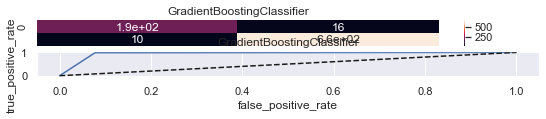

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.9266895761741123
Cross-val-score= 0.8943718319299568


roc_auc_score 0.8720459590024807


              precision    recall  f1-score   support

           0       0.91      0.77      0.83       207
           1       0.93      0.98      0.95       666

    accuracy                           0.93       873
   macro avg       0.92      0.87      0.89       873
weighted avg       0.93      0.93      0.92       873



[[159  48]
 [ 16 650]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


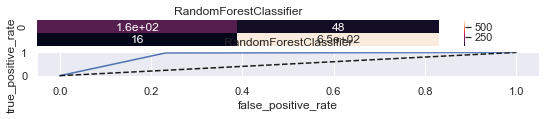

************** BaggingClassifier ***********


BaggingClassifier()


accuracy score 0.9759450171821306
Cross-val-score= 0.9660906539315487


roc_auc_score 0.9709165687426558


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       207
           1       0.99      0.98      0.98       666

    accuracy                           0.98       873
   macro avg       0.96      0.97      0.97       873
weighted avg       0.98      0.98      0.98       873



[[199   8]
 [ 13 653]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


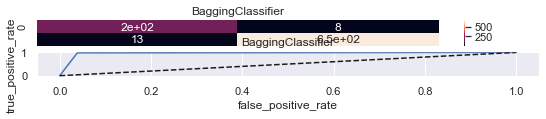

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.9725085910652921
Cross-val-score= 0.9761771605714046


roc_auc_score 0.9553466509988249


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       207
           1       0.98      0.99      0.98       666

    accuracy                           0.97       873
   macro avg       0.97      0.96      0.96       873
weighted avg       0.97      0.97      0.97       873



[[191  16]
 [  8 658]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


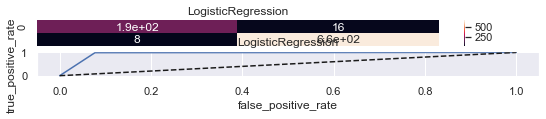

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.9530355097365406
Cross-val-score= 0.9429412257551002


roc_auc_score 0.9442485964225096


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       207
           1       0.98      0.96      0.97       666

    accuracy                           0.95       873
   macro avg       0.93      0.94      0.94       873
weighted avg       0.95      0.95      0.95       873



[[192  15]
 [ 26 640]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


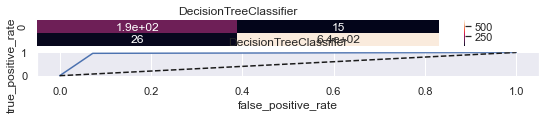

In [386]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
seed=7
#prepare models
models=[]
models.append(('GradientBoostingClassifier',gbcr))
models.append(('RandomForestClassifier',rfc))
models.append(('BaggingClassifier',bc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dc))


#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(X_c_ng_train,y_c_ng_train)
    print(model)
    pred=model.predict(X_c_ng_test)
    print('\n')
    acc=accuracy_score(y_c_ng_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv=model_selection.cross_val_score(model,X_c_ng,y_c_ng,cv=20,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_c_ng_test,pred)
    roc_auc=roc_auc_score(y_c_ng_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_c_ng_test,pred))
    print('\n')
    cm=confusion_matrix(y_c_ng_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(9,5))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [388]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

Model        cvs      score   rocscore
0  GradientBoostingClassifier  96.610217  97.021764  95.384515
1      RandomForestClassifier  89.437183  92.668958  87.204596
2           BaggingClassifier  96.609065  97.594502  97.091657
3          LogisticRegression  97.617716  97.250859  95.534665
4      DecisionTreeClassifier  94.294123  95.303551  94.424860

In [389]:
pred = bc.predict(X_c_ng_test)
#print("Training Accuracy : ", accuracy_score(y_c_ng_train,pred))
print("Testing Accuracy : ", accuracy_score(y_c_ng_test,pred))

Testing Accuracy :  0.9759450171821306


In [390]:
Predicted_sleep_Quality=[]
Actual_sleep_Quality=[]
result=pd.DataFrame({"Predicted Sleep Quality":pred,"Actual Sleep Quality":y_c_ng_test})
result.head()

Predicted Sleep Quality  Actual Sleep Quality
1551                        1                     1
561                         1                     1
621                         1                     1
2825                        1                     1
1611                        1                     1

In [391]:
pickle.dump(bc, open('bc.pkl', 'wb'))

In [392]:
print('Quality of sleep wihtout Covid')
pickled_model = pickle.load(open('bc.pkl', 'rb'))
pickled_model.predict([[ 0.        ,  1.        , 30.        ,  2.        ,  7.        ,
         2.        ,  0.        ,  0.        ,  8.        ,  7.        ,
         0.        ,  1.        ,  1.        , 20.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  5.        ,
         2.        ,  0.08333333,  0.        ,  5.5       ,  0.        ,
         5.13333333,  1.        , 22.        , 30.        , 23.        ,
         0.        ,  4.        , 30.        ,  9.        , 35.         
                  ]])

Quality of sleep wihtout Covid


array([1])

## <a id='9'>IS X (i/p)Variables Impact Target (o/p)</a>

In [393]:
pickled_model.predict([[0.        ,  1.        , 15.        ,  2.        ,  7.        ,
         2.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        , 20.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  5.        ,
         2.        ,  6.08333333,  0.        ,  5.5       ,  0.        ,
         5.13333333,  1.        , 22.        , 30.        , 23.        ,
         0.        ,  4.        , 30.        ,  4.        , 45.        
            ]])

array([0])

In [394]:
pickled_model = pickle.load(open('bc.pkl', 'rb'))
pickled_model.predict([[0.        ,  1.        , 3.        ,  2.        ,  3.        ,
         2.        ,  0.        ,  0.        ,  8.        ,  7.        ,
         0.        ,  1.        ,  1.        , 20.        ,  0.        ,
         0.        ,  0.        ,  6.        ,  0.        ,  25.        ,
         2.        ,  6.08333333,  0.        ,  5.5       ,  40.        ,
         4.13333333,  1.        , 52.        , 30.        , 3.        ,
         2.        ,  4.        , 0.        ,  9.        , 28.         
                  ]])

array([0])

## **Observations**
****X variables as predictors and y as target variable i.e Quality of sleep with zeros and ones  <br>
** 1 is better quality sleep: higher, 0 is low quality sleep,* <br>
** As you can see above, i gave two different inputs , predicted outcome is differ, i.e target variable which is impacted more by x variables (i/p variables)***

## Applying Machine Learning Models on Covid +ve Sleep quality data

In [395]:
X_c_pos = data_c_pos.drop(['SE_1'], axis = 1)
y_c_pos=data_c_pos.SE_1

In [396]:
scaler = preprocessing.StandardScaler()
X_c_pos = scaler.fit_transform(X_c_pos)

In [397]:
from sklearn.model_selection import train_test_split
X_c_pos_train, X_c_pos_test, y_c_pos_train, y_c_pos_test = train_test_split(X_c_pos, y_c_pos, test_size = 0.20, random_state = 42)

In [398]:
bc=BaggingClassifier()
dc=DecisionTreeClassifier()
lr=LogisticRegression()
rfc=RandomForestClassifier()

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.6666666666666666
Cross-val-score= 0.925


roc_auc_score 0.5


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



[[0 2]
 [0 4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


************** BaggingClassifier ***********


BaggingClassifier()


accuracy score 0.6666666666666666
Cross-val-score= 0.975


roc_auc_score 0.5


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



[[0 2]
 [0 4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.6666666666666666
Cross-val-score= 0.925


roc_auc_score 0.5


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



[[0 2]
 [0 4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


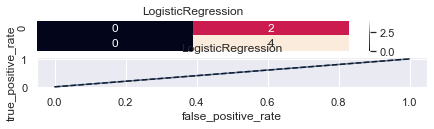

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 1.0
Cross-val-score= 1.0


roc_auc_score 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



[[2 0]
 [0 4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


In [399]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
seed=7
#prepare models
models=[]
models.append(('RandomForestClassifier',rfc))
models.append(('BaggingClassifier',bc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dc))


#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(X_c_pos_train,y_c_pos_train)
    print(model)
    pred=model.predict(X_c_pos_test)
    print('\n')
    acc=accuracy_score(y_c_pos_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv=model_selection.cross_val_score(model,X_c_pos,y_c_pos,cv=20,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_c_pos_test,pred)
    roc_auc=roc_auc_score(y_c_pos_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_c_pos_test,pred))
    print('\n')
    cm=confusion_matrix(y_c_pos_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(7,6))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [400]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

Model    cvs       score  rocscore
0  RandomForestClassifier   92.5   66.666667      50.0
1       BaggingClassifier   97.5   66.666667      50.0
2      LogisticRegression   92.5   66.666667      50.0
3  DecisionTreeClassifier  100.0  100.000000     100.0

In [401]:
pred = dc.predict(X_c_pos_test)
#print("Training Accuracy : ", accuracy_score(y_c_ng_train,pred))
print("Testing Accuracy : ", accuracy_score(y_c_pos_test,pred))

Testing Accuracy :  1.0


In [154]:
Predicted_sleep_Quality=[]
Actual_sleep_Quality=[]
result=pd.DataFrame({"Predicted Sleep Quality":pred,"Actual Sleep Quality":y_c_pos_test})
result.head()

Predicted Sleep Quality  Actual Sleep Quality
27                        1                     1
15                        1                     1
23                        1                     1
17                        0                     0
8                         1                     1

In [402]:
pickle.dump(dc, open('dc.pkl', 'wb'))

In [403]:
print('Quality of sleep wiht Covid')
pickled_model = pickle.load(open('dc.pkl', 'rb'))
pickled_model.predict([[203.        ,   1.        ,   5.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          1.        ,  90.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ,   1.        ,
          3.        ,  48.        ,   4.58333333,   0.        ,
          4.58333333,   0.        ,   4.5       ,   0.98181818,
          0.        ,   4.        ,   0.        ,   4.        ,
          0.        ,   8.        ,  35.        ,   8.        ,
         35.             
                  ]])

Quality of sleep wiht Covid


array([1])

In [404]:
x_train, x_test, label_train, label_test = train_test_split(X_c_ng,y_c_ng, test_size =0.2,random_state = 0,shuffle= True)

In [405]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

## <a id='10'> **UnderSampling** </a>

In [406]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(random_state=0)
X_train_ures, y_train_ures = undersample.fit_resample(x_train, label_train)
print("The number of classes before fit {}".format(Counter(label_train)))
print("The number of classes after fit {}".format(Counter(y_train_ures)))

The number of classes before fit Counter({1: 2602, 0: 890})
The number of classes after fit Counter({0: 890, 1: 890})


In [407]:
x = label_train.value_counts()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.08])
plt.title('Quality of Sleep Class before Sampling')

plt.show()

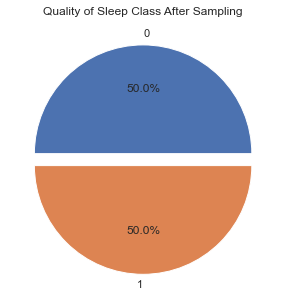

In [408]:
x = y_train_ures.value_counts()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.08])
plt.title('Quality of Sleep Class After Sampling')

plt.show()

## <a id='10.1'>**Applying Machine Learning algorithms on Under_Sampling Data** </a>

## **Logistic Regression**

In [409]:
lr.fit(X_train_ures,y_train_ures)
y_pred1 = lr.predict(x_test)                #making prediction on test data
print(confusion_matrix(label_test,y_pred1))  # printing confusion matix
print(accuracy_score(label_test,y_pred1))     # printing accuracy score
print(classification_report(label_test,y_pred1))    #printing classification report

[[209   3]
 [ 19 642]]
0.9747995418098511
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       212
           1       1.00      0.97      0.98       661

    accuracy                           0.97       873
   macro avg       0.96      0.98      0.97       873
weighted avg       0.98      0.97      0.98       873



In [410]:
accuracy1=accuracy_score(label_test,y_pred1)
precision1 = precision_score(label_test, y_pred1, average = 'weighted')
recall1 = recall_score(label_test, y_pred1, average = 'weighted')
f1_score1 = f1_score(label_test, y_pred1, average = 'weighted')
print("Precision: %s, Recall: %s, f1_score: %s, accuracy: %s" %(precision1, recall1, f1_score1, accuracy1))

Precision: 0.9762415976273564, Recall: 0.9747995418098511, f1_score: 0.9751033646804158, accuracy: 0.9747995418098511


In [411]:
y_prob = lr.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(label_test, y_prob)
lr_auc = metrics.roc_auc_score(label_test, y_prob)
y_pred = lr.predict(x_test)

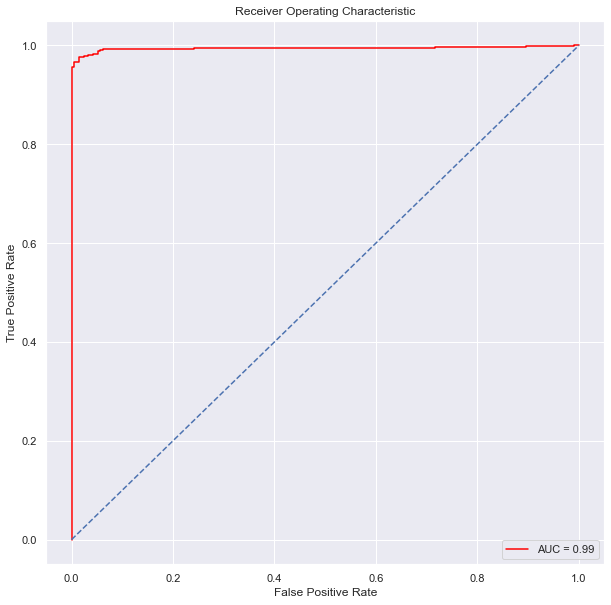

In [412]:
ROC(label_test, y_prob)

## **Bagging Classifier**

In [414]:
bc.fit(X_train_ures,y_train_ures)
y_pred2 = bc.predict(x_test)                #making prediction on test data
print(confusion_matrix(label_test,y_pred2))  # printing confusion matix
print(accuracy_score(label_test,y_pred2))     # printing accuracy score
print(classification_report(label_test,y_pred2))    #printing classification report

[[207   5]
 [ 25 636]]
0.9656357388316151
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       212
           1       0.99      0.96      0.98       661

    accuracy                           0.97       873
   macro avg       0.94      0.97      0.95       873
weighted avg       0.97      0.97      0.97       873



In [415]:
accuracy1=accuracy_score(label_test,y_pred2)
precision1 = precision_score(label_test, y_pred2, average = 'weighted')
recall1 = recall_score(label_test, y_pred2, average = 'weighted')
f1_score1 = f1_score(label_test, y_pred2, average = 'weighted')
print("Precision: %s, Recall: %s, f1_score: %s, accuracy: %s" %(precision1, recall1, f1_score1, accuracy1))

Precision: 0.9679257344485034, Recall: 0.9656357388316151, f1_score: 0.966145774260174, accuracy: 0.9656357388316151


In [416]:
y_prob = bc.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(label_test, y_prob)
lr_auc = metrics.roc_auc_score(label_test, y_prob)
y_pred = bc.predict(x_test)

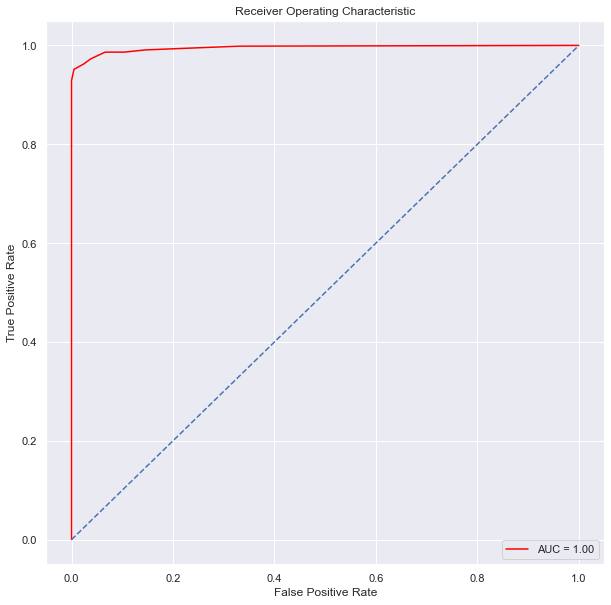

In [417]:
ROC(label_test, y_prob)

## **Decision Tree Classifier**

In [418]:
dc.fit(X_train_ures,y_train_ures)             # fitting data to train the model
y_pred3 = dc.predict(x_test)                # making prediction on test data
print(confusion_matrix(label_test,y_pred3))    # printing confusion matrix
print(accuracy_score(label_test,y_pred3))      # printing accuracy score
print(classification_report(label_test,y_pred3)) # printing classification report

[[200  12]
 [ 26 635]]
0.9564719358533792
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       212
           1       0.98      0.96      0.97       661

    accuracy                           0.96       873
   macro avg       0.93      0.95      0.94       873
weighted avg       0.96      0.96      0.96       873



In [419]:
accuracy1=accuracy_score(label_test,y_pred3)
precision1 = precision_score(label_test, y_pred3, average = 'weighted')
recall1 = recall_score(label_test, y_pred3, average = 'weighted')
f1_score1 = f1_score(label_test, y_pred3, average = 'weighted')
print("Precision: %s, Recall: %s, f1_score: %s, accuracy: %s" %(precision1, recall1, f1_score1, accuracy1))

Precision: 0.9580194266895057, Recall: 0.9564719358533792, f1_score: 0.9569346414910652, accuracy: 0.9564719358533792


In [420]:
y_prob = dc.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(label_test, y_prob)
lr_auc = metrics.roc_auc_score(label_test, y_prob)
y_pred = dc.predict(x_test)

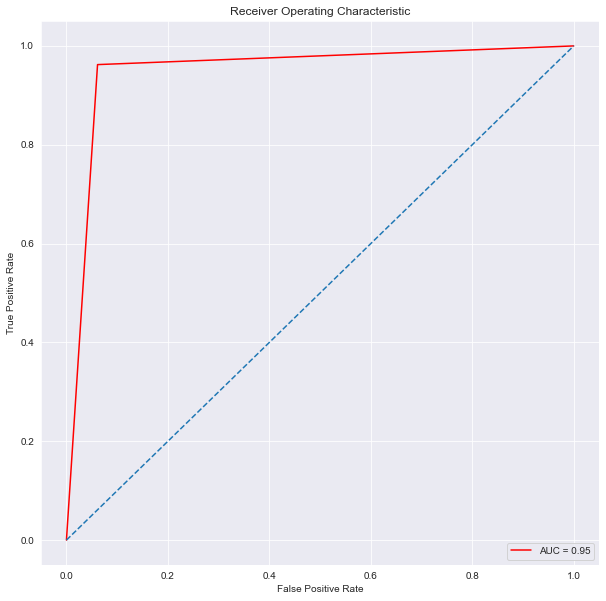

In [174]:
ROC(label_test, y_prob)

In [421]:
pred=lr.predict(x_test)
Predicted_sleep_Quality=[]
Actual_sleep_Quality=[]
result=pd.DataFrame({"Predicted Sleep Quality":pred,"Actual Sleep Quality":label_test})
result.head()

Predicted Sleep Quality  Actual Sleep Quality
3452                        1                     1
224                         0                     1
3551                        1                     1
2854                        1                     1
1952                        1                     1

## <a id='11'>**OverSampling** </a>

In [422]:
x_train, x_test, label_train, label_test = train_test_split(X_c_ng,y_c_ng, test_size =0.2,random_state = 0,shuffle= True)

In [423]:
sm=SMOTE(random_state=0)                        # balancing imbalanced labels using smote oversampling
X_train_res, y_train_res = sm.fit_resample(x_train, label_train)
print("The number of classes before fit {}".format(Counter(label_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({1: 2602, 0: 890})
The number of classes after fit Counter({1: 2602, 0: 2602})


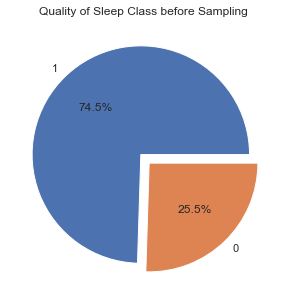

In [424]:
x = label_train.value_counts()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.08])
plt.title('Quality of Sleep Class before Sampling')

plt.show()

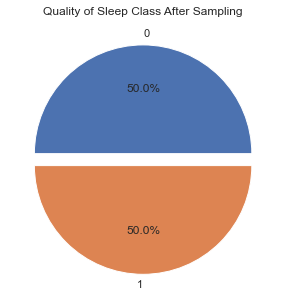

In [425]:
x = y_train_res.value_counts()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.08])
plt.title('Quality of Sleep Class After Sampling')

plt.show()

## <a id='12'> <center>**Applying Machine Learning Algorithms on OverSampling Data**</center> </a>

## **Bagging Classifier**

In [426]:
y_pred1 = bc.predict(x_test)                #making prediction on test data
print(confusion_matrix(label_test,y_pred1))  # printing confusion matix
print(accuracy_score(label_test,y_pred1))     # printing accuracy score
print(classification_report(label_test,y_pred1))    #printing classification report

[[207   5]
 [ 25 636]]
0.9656357388316151
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       212
           1       0.99      0.96      0.98       661

    accuracy                           0.97       873
   macro avg       0.94      0.97      0.95       873
weighted avg       0.97      0.97      0.97       873



In [427]:
accuracy1=accuracy_score(label_test,y_pred1)
precision1 = precision_score(label_test, y_pred1, average = 'weighted')
recall1 = recall_score(label_test, y_pred1, average = 'weighted')
f1_score1 = f1_score(label_test, y_pred1, average = 'weighted')
print("Precision: %s, Recall: %s, f1_score: %s, accuracy: %s" %(precision1, recall1, f1_score1, accuracy1))

Precision: 0.9679257344485034, Recall: 0.9656357388316151, f1_score: 0.966145774260174, accuracy: 0.9656357388316151


## **Logistic Regression**

In [428]:
lr.fit(X_train_res,y_train_res)
y_pred1 = lr.predict(x_test)                #making prediction on test data
print(confusion_matrix(label_test,y_pred1))  # printing confusion matix
print(accuracy_score(label_test,y_pred1))     # printing accuracy score
print(classification_report(label_test,y_pred1))    #printing classification report

[[210   2]
 [ 15 646]]
0.9805269186712485
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       212
           1       1.00      0.98      0.99       661

    accuracy                           0.98       873
   macro avg       0.97      0.98      0.97       873
weighted avg       0.98      0.98      0.98       873



In [429]:
accuracy1=accuracy_score(label_test,y_pred1)
precision1 = precision_score(label_test, y_pred1, average = 'weighted')
recall1 = recall_score(label_test, y_pred1, average = 'weighted')
print("Precision: %s, Recall: %s, accuracy: %s" %(precision1, recall1,  accuracy1))

Precision: 0.9814737035622869, Recall: 0.9805269186712485, accuracy: 0.9805269186712485


## **Decission Tree Classifier**

In [430]:
dc.fit(X_train_res,y_train_res)             # fitting data to train the model
y_pred2 = dc.predict(x_test)                # making prediction on test data
print(confusion_matrix(label_test,y_pred2))    # printing confusion matrix
print(accuracy_score(label_test,y_pred2))      # printing accuracy score
print(classification_report(label_test,y_pred2)) # printing classification report

[[198  14]
 [ 17 644]]
0.9644902634593356
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       212
           1       0.98      0.97      0.98       661

    accuracy                           0.96       873
   macro avg       0.95      0.95      0.95       873
weighted avg       0.96      0.96      0.96       873



In [431]:
accuracy2=accuracy_score(label_test,y_pred2)
precision2 = precision_score(label_test, y_pred2, average = 'weighted')
recall2 = recall_score(label_test, y_pred2, average = 'weighted')
#f1_score2 = f1_score(label_test, y_pred2, average = 'weighted')
print("Precision: %s, Recall: %s, accuracy: %s" %(precision2, recall2, accuracy2))

Precision: 0.9646888654239307, Recall: 0.9644902634593356, accuracy: 0.9644902634593356


## **Random Forest Classifier**

In [432]:
rfc.fit(X_train_res,y_train_res)        # fitting data to train the model

y_pred3 = rfc.predict(x_test)          #predicting test data 
print(confusion_matrix(label_test,y_pred3))    # printing confusion matrix
print(accuracy_score(label_test,y_pred3))         # printing accuracy score
print(classification_report(label_test,y_pred3))    # printing classification report

[[181  31]
 [ 22 639]]
0.9392898052691867
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       212
           1       0.95      0.97      0.96       661

    accuracy                           0.94       873
   macro avg       0.92      0.91      0.92       873
weighted avg       0.94      0.94      0.94       873



In [433]:
accuracy3=accuracy_score(label_test,y_pred3)
precision3 = precision_score(label_test, y_pred3, average = 'weighted')
recall3 = recall_score(label_test, y_pred3, average = 'weighted')
#f1_score3 = f1_score(label_test, y_pred1, average = 'weighted')
print("Precision: %s, Recall: %s, accuracy: %s" %(precision3, recall3, accuracy3))

Precision: 0.9386495400370214, Recall: 0.9392898052691867, accuracy: 0.9392898052691867


In [434]:
pred=lr.predict(x_test)
Predicted_sleep_Quality=[]
Actual_sleep_Quality=[]
result=pd.DataFrame({"Predicted Sleep Quality":pred,"Actual Sleep Quality":label_test})
result.head()

Predicted Sleep Quality  Actual Sleep Quality
3452                        1                     1
224                         1                     1
3551                        1                     1
2854                        1                     1
1952                        1                     1

## <a id='13'> **Feature Engineering** </a>

In [435]:
importance_rf = pd.DataFrame({        #Feature important sco
    'feature': x_c_ng.columns,
    'score': rfc.feature_importances_
}).sort_values('score', ascending=False)

importance_rf.head(10)

feature     score
25                      TST  0.169399
21                      TIB  0.159202
23             sleepattempt  0.081277
4      night_awakening_time  0.072855
2   sleepdiary_sleeplatency  0.058744
3          sleepdiary_wakes  0.043378
33    sleepdiary_outofbed_h  0.043110
0                     index  0.041533
19                   stress  0.033650
27     sleepdiary_bedtime_h  0.031482

[Text(0.5, 0, 'Score'), Text(0, 0.5, 'Feature')]

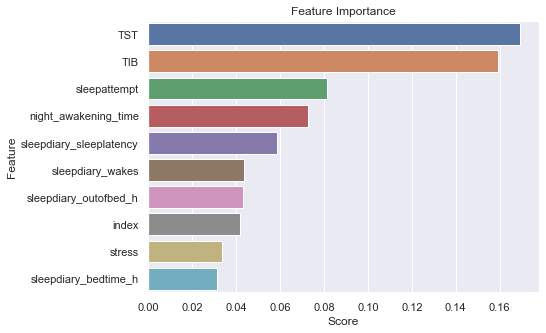

In [436]:
plt.figure(figsize = (7,5))
sns.set(font_scale = 1)
plt.title('Feature Importance')
ax = sns.barplot(data=importance_rf.head(10), x='score', y='feature')
ax.set(xlabel='Score', ylabel='Feature')

## **Observations**
* **After applying Feature Engineering technique we can see top 10 most important features above**
* **Original dataset size i.e 36 features  after doing Feature Engineering we got 10 important features**

## <a id='14'> **Hyper Parameter Optimization** </a>

In [190]:
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, cross_validate, GridSearchCV

In [191]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          } ## Passing hyper paramter

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train_res, y_train_res)
best_params = tree_cv.best_params_  ## getting best parameters
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_res, y_train_res) ## fitting model 

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [192]:
y_pred3 = tree_clf.predict(x_test)          #predicting test data 
print(confusion_matrix(label_test,y_pred3))    # printing confusion matrix
print(accuracy_score(label_test,y_pred3))         # printing accuracy score
print(classification_report(label_test,y_pred3))    # printing classification report

[[199  13]
 [ 14 647]]
0.9690721649484536
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       212
           1       0.98      0.98      0.98       661

    accuracy                           0.97       873
   macro avg       0.96      0.96      0.96       873
weighted avg       0.97      0.97      0.97       873



In [116]:
y_prob = tree_clf.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(label_test, y_prob)
lr_auc = metrics.roc_auc_score(label_test, y_prob)
y_pred = tree_clf.predict(x_test)

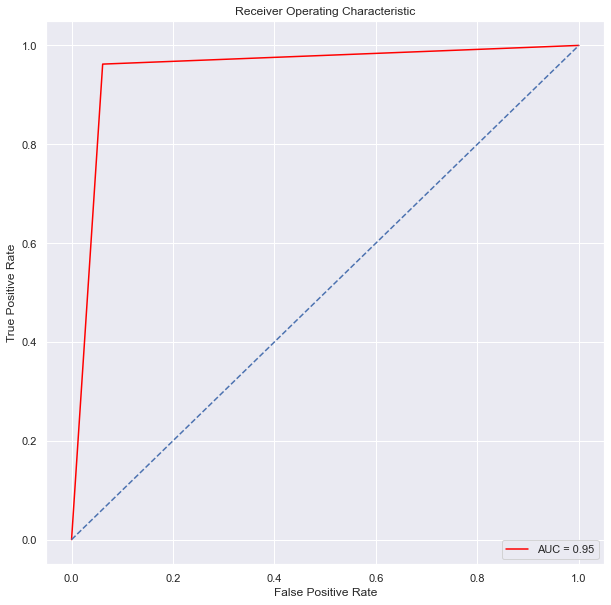

In [193]:
ROC(label_test, y_prob)

## **Conclusion**
* **After Observing all the models in Classification both before oversampling/Undersampling, Best models in terms of both accuracy and error Bagging classifier && Decision Tree Classifier working well.**
* **Final Conclusion of this project i.e Quality of Sleep is Better in people without COVID as Compared to Quality of Sleep in people with COVID**
* **Covid is Effecting Quality of Sleep in People**
* **People who have Covid they facing Issues with sleeping i.e their quality of sleep is less**
* **And Covid is effecting based on i/p variables i.e With two different inputs , predicted outcome is differ, i.e target variable which is impacted more by x variables i.e (i/p variables)**